# This co-infection code is edited and is corrected to include proper reinfections..Solving the model:

# This is co-infection model:
And the model diagram is: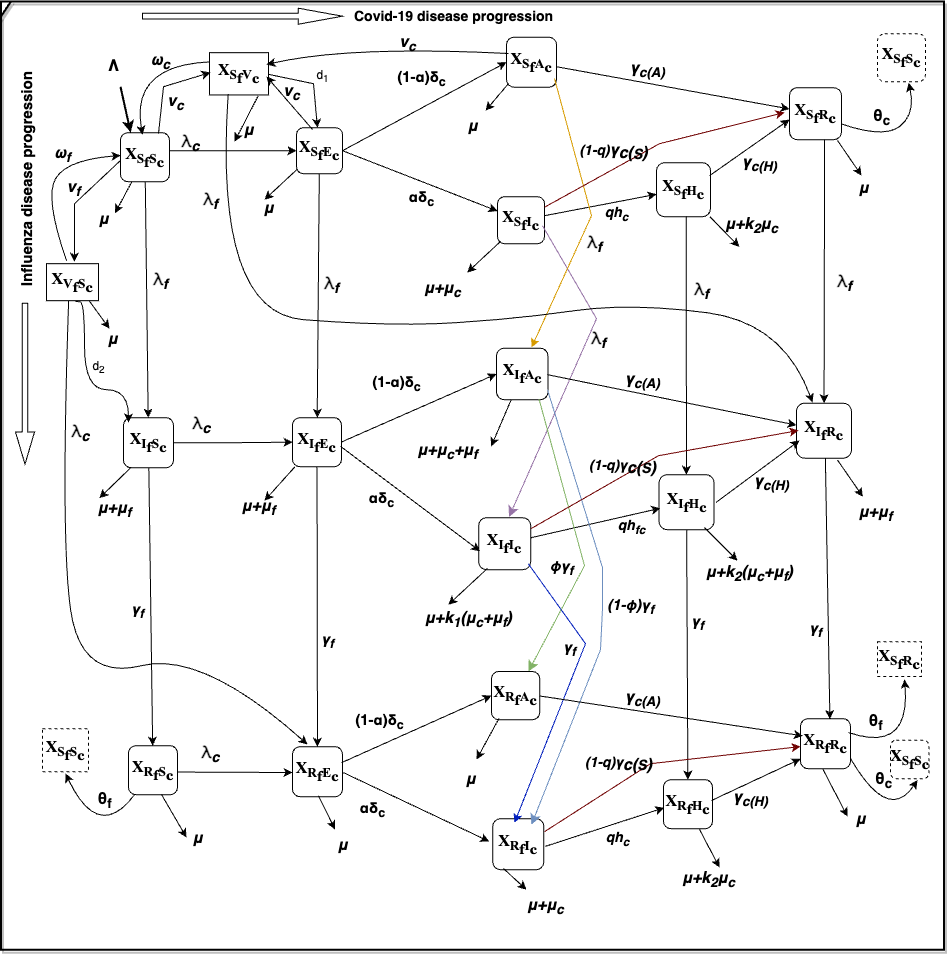

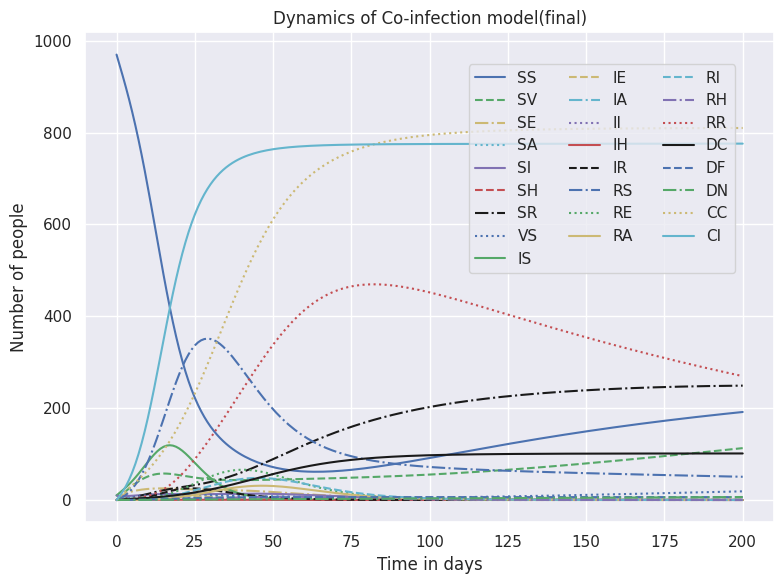

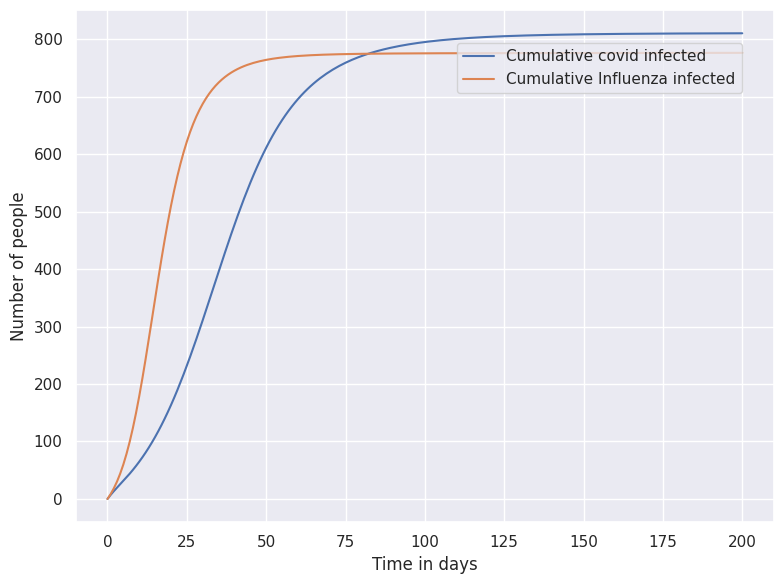

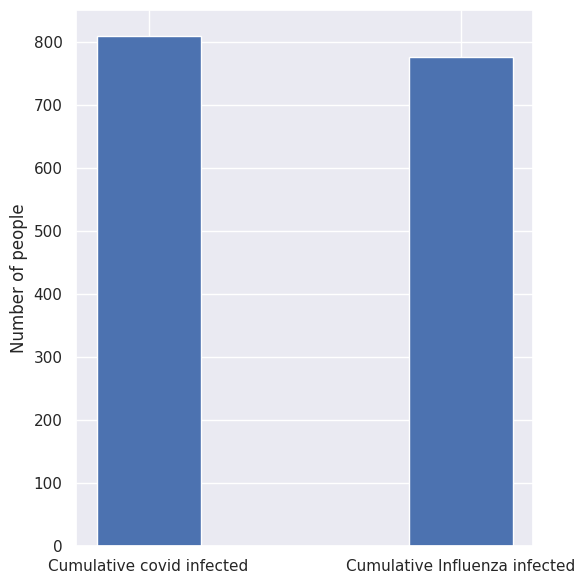

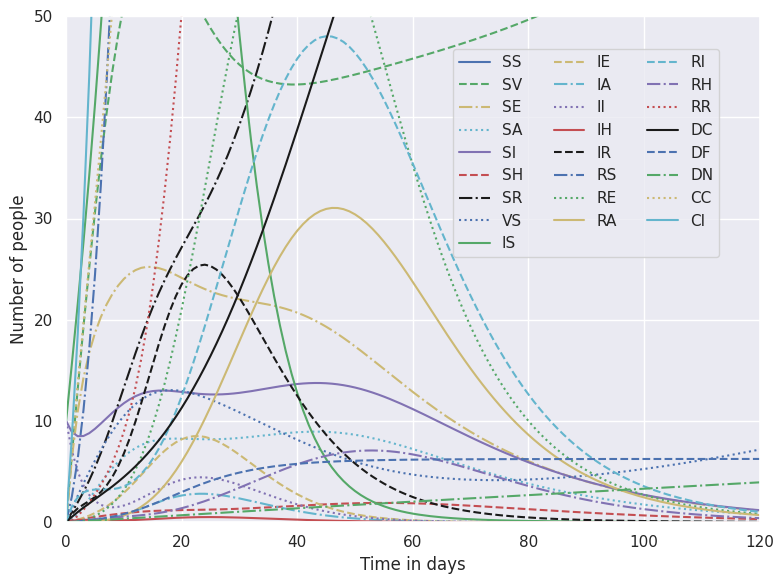

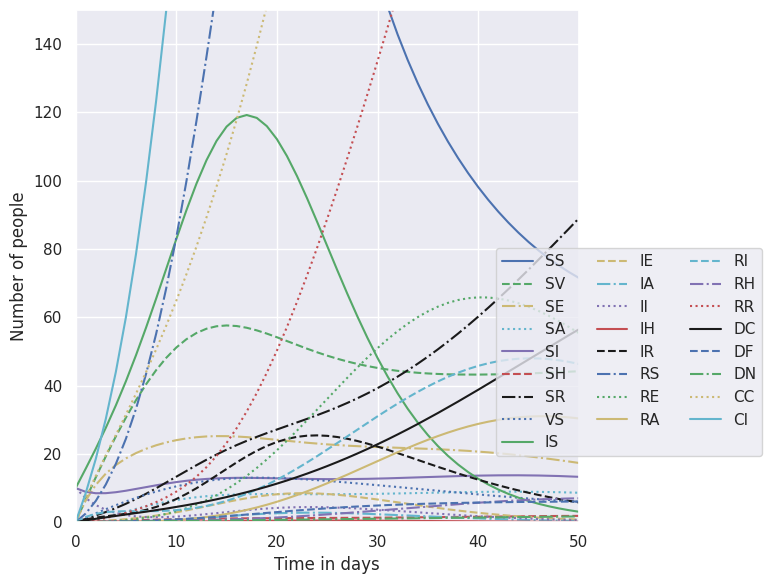

In [ ]:
# This is doing excellent job ....
# This co-infection code is edited and is corrected to include proper reinfections..

import matplotlib.pyplot as plt
import seaborn
seaborn.set()
from scipy.integrate import solve_ivp
import numpy as np

def model1(t, y, Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
           etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N):
    ss, sv, se, sa, si, sh, sr, vs, ks, ie, ia, ii, ih, ir, rs, re, ra, ri, rh, rr, DFC, DC, DN, CC,CI = y
    # if t < 365:
    #   thetac = 0
    #   thetaf = 0
    # #     vc = 0
    # #     vf = 0
    # #     wc = 0
    # #     wf = 0
    # #     ec = 0
    # #     ef = 0
    # #     thetac=0
    dSS_dt = Lambda + thetac * (sr+rr) + thetaf * rs +wc *sv + wf* vs - u2* vc * ss - u3* vf* ss - (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * ss / N - (1-u1)*betac * (etaA* sa+ si+ etaH* sh + ia + ii + etaH * ih + ra + ri + etaH * rh) * ss / N - mu * ss
    dSV_dt = u2* vc *(ss +se +sa) - (wc + (1 - u4*ec) * (1-u1)*betac * (etaA* sa+  si + etaH * sh + ia +  ii + etaH * ih + ra +  ri + etaH * rh) / N + mu + (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) / N) * sv
    dSE_dt = (1 - u4*ec) * (1-u1)*betac * (etaA* sa+ si + etaH * sh + ia +  ii + etaH * ih + ra + ri + etaH * rh) * sv / N + (1-u1)*betac * (etaA* sa+  si + etaH * sh + ia +  ii + etaH * ih + ra +  ri + etaH * rh) * ss / N  - deltac * se - (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * se / N - (mu +u2* vc) * se
    dSA_dt = (1 - alpha) * deltac * se - gammacA * sa - (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * sa / N - (mu + u2* vc) * sa
    dSI_dt = alpha * deltac * se - (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * si / N - (q*hc + (1-q)* u5* gammacI + mu + muc) * si
    dSH_dt = q*hc * si - (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * sh / N - (mu + kappa2 * muc + u5* gammacH) * sh
    dSR_dt = gammacA * sa + thetaf * rr + (1-q)* u5* gammacI * si + u5* gammacH* sh - (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * sr / N - thetac * sr - mu * sr
    dVS_dt = u3* vf* ss - (wf + (1 - u4*ef) * (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) / N + mu + (1-u1)*betac * (etaA* sa+  si + etaH * sh + ia +  ii + etaH * ih + ra +  ri + etaH * rh) / N) * vs
    dKS_dt = (1 - u4*ef) * (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * vs / N + (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * ss / N - (1-u1)*betac * (etaA* sa+  si + etaH * sh + ia +  ii + etaH * ih + ra +  ri + etaH * rh) * ks / N - gammaf * ks - mu * ks -muf *ks
    dIE_dt = (1-u1)*betac * (etaA* sa+  si + etaH * sh + ia +  ii + etaH * ih + ra +  ri + etaH * rh) * ks / N + (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * se / N - (deltac + gammaf) * ie - mu * ie -muf *ie
    dIA_dt = (1 - alpha) * deltac * ie + (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * sa / N - gammacA * ia - gammaf * ia - (mu + muc + muf ) *ia
    dII_dt = alpha * deltac * ie + (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * si / N - (q*hfc + (1-q)* u5* gammacI) * ii - gammaf * ii - mu *ii - kappa1*(muc+ muf ) * ii
    dIH_dt = q*hfc * ii + (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * sh / N - (u5* gammacH+ gammaf + mu + kappa2 *(muc+ muf)) * ih
    dIR_dt = gammacA * ia + (1-q)* u5* gammacI * ii + u5* gammacH* ih + (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * (sr + sv) / N - (gammaf + mu +muf) * ir
    dRS_dt = gammaf * ks - (1-u1)*betac * (etaA* sa+  si + etaH * sh + ia +  ii + etaH * ih + ra +  ri + etaH * rh) * rs / N - thetaf * rs - mu * rs
    dRE_dt = (1-u1)*betac * (etaA* sa+  si + etaH * sh + ia +  ii + etaH * ih + ra +  ri + etaH * rh) * (rs + vs) / N + gammaf * ie - deltac * re - mu * re
    dRA_dt = (1 - alpha) * deltac * re + phi * gammaf * ia - gammacA * ra - mu* ra
    dRI_dt = alpha * deltac * re + (1 - phi) * gammaf * ia + gammaf * ii - ((1-q)* u5* gammacI + q*hc + mu + muc) * ri
    dRH_dt = q*hc * ri + gammaf * ih - (u5* gammacH+ mu + kappa2 * muc) * rh
    dRR_dt = gammacA * ra + (1-q)* u5* gammacI *ri + u5* gammacH* rh + gammaf * ir - (thetac + thetaf + mu) * rr
    dDC_dt = muc*(si + kappa2* sh +ia + kappa1*ii + kappa2*ih +ri + kappa2*rh)
    dDF_dt = muf*(ks + ie + ia + kappa1* ii+ kappa2* ih + ir)
    dDN_dt = mu * (ss+ sv+ se+ sa+ si+ sh +sr+ vs+ ks+ ie+ ia+ ii+ ih+ ir+ rs+ re+ ra+ ri+ rh+ rr)
    dCC_dt= (1 - u4*ec) * (1-u1)*betac * (etaA* sa+ si + etaH * sh + ia +  ii + etaH * ih + ra + ri + etaH * rh) * sv / N + (1-u1)*betac * (etaA* sa+  si + etaH * sh + ia +  ii + etaH * ih + ra +  ri + etaH * rh) * ss / N + (1-u1)*betac * (etaA* sa+  si + etaH * sh + ia +  ii + etaH * ih + ra +  ri + etaH * rh) * ks / N+ (1-u1)*betac * (etaA* sa+  si + etaH * sh + ia +  ii + etaH * ih + ra +  ri + etaH * rh) * (rs + vs) / N
    dCI_dt= (1 - u4*ef) * (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * vs / N + (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * ss / N + (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * se / N + (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * sa / N +  (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * si / N +  (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * sh / N +  (1-u1)*betaf * (ks + ie + ia + ii + etaH * ih + ir) * (sr + sv) / N
    return [dSS_dt, dSV_dt, dSE_dt, dSA_dt, dSI_dt, dSH_dt, dSR_dt, dVS_dt, dKS_dt, dIE_dt, dIA_dt, dII_dt, dIH_dt, dIR_dt, dRS_dt, dRE_dt, dRA_dt, dRI_dt, dRH_dt, dRR_dt, dDC_dt, dDF_dt, dDN_dt, dCC_dt, dCI_dt]

# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.0014
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1


# Initialize time and initial conditions
t = 0
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0]

# Lists to store the results at each time step
times = []
results = []
cumulative_covid_coinfectionmodel=[]
cumulative_Influenza_coinfectionmodel=[]
# Integration loop with a fixed time step of 1 day

sum1 = y0[2:6] + y0[9:13] + y0[15:19]  # Initialize cumulative_covid_coinfectionmodel sum
sum2 = y0[8:14]  # Initialize cumulative_Influenza_coinfectionmodel sum

while t <= t_end:
    times.append(t)
    results.append(y0)

    sum1 = np.sum(y0[23])
    sum2 = np.sum(y0[24])

    cumulative_covid_coinfectionmodel.append(sum1)
    cumulative_Influenza_coinfectionmodel.append(sum2)

    sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

    t = t + 1
    y0 = sol.y[:, -1]


# Convert results to a numpy array for easier manipulation
results = np.array(results)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))  # Set a specific figure size

# Define line styles and colors
line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'y', 'c', 'm', 'r', 'k']

curves = ax.plot(times, results)

# Assign different colors and line styles
for i, curve in enumerate(curves):
    curve.set_linestyle(line_styles[i % len(line_styles)])
    curve.set_color(colors[i % len(colors)])

# ax.set_xlim(0, 250) # Remove this two lines if you want complete  diagram
# ax.set_ylim(0,700)
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of Co-infection model(final)')
# Adjust legend position and size
legend = ax.legend(['SS', 'SV', 'SE', 'SA', 'SI', 'SH', 'SR', 'VS', 'IS', 'IE', 'IA', 'II', 'IH', 'IR',
                    'RS', 'RE', 'RA', 'RI', 'RH', 'RR', 'DC', 'DF', 'DN','CC','CI'],
                   loc='upper center', bbox_to_anchor=(0.75, 0.95), ncol=3)

plt.tight_layout()

plt.savefig('fig_coinfn_final.png')
# plt.show()
#################

#########################################################
### Plot only the Cumulative covid infected and Influenza
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(times,cumulative_covid_coinfectionmodel, label='Cumulative covid infected')
ax.plot(times,cumulative_Influenza_coinfectionmodel, label='Cumulative Influenza infected')
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.75, 0.95), ncol=1)
plt.tight_layout()

################### Bar diagram

# Final values of Cumulative COVID and Influenza infections
final_covid = cumulative_covid_coinfectionmodel[-1]
final_influenza = cumulative_Influenza_coinfectionmodel[-1]

# Create a bar diagram for the final values
fig, ax = plt.subplots(figsize=(6, 6))
# Set your desired bar width
bar_width = 0.1

# Custom bar positions
bar_positions = [0.25, 0.55]  # Adjust these values to change the bar positions

# Bar heights
bar_heights = [final_covid, final_influenza]

# Create bars
ax.bar(bar_positions, bar_heights, width=bar_width)

# Set custom tick positions and labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(['Cumulative covid infected', 'Cumulative Influenza infected'])

ax.set_ylabel('Number of people')

plt.tight_layout()
plt.show()

############################### ZOOOOOMMMMMMM
# The following code is to zoom a portion of graph

fig, ax = plt.subplots(figsize=(8, 6))  # Set a specific figure size

# Define line styles and colors
line_styles = ['-','--', '-.', ':']
colors = ['b', 'g', 'y', 'c', 'm', 'r', 'k']

curves = ax.plot(times, results)

# Assign different colors and line styles
for i, curve in enumerate(curves):
    curve.set_linestyle(line_styles[i % len(line_styles)])
    curve.set_color(colors[i % len(colors)])

# Set x-axis limits to zoom in from 0 to 100 days
ax.set_xlim(0, 120)
ax.set_ylim(0,50)
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')

# Adjust legend position and size
legend = ax.legend(['SS', 'SV', 'SE', 'SA', 'SI', 'SH', 'SR', 'VS', 'IS', 'IE', 'IA', 'II', 'IH', 'IR', 'RS', 'RE', 'RA', 'RI', 'RH', 'RR', 'DC', 'DF', 'DN', 'CC', 'CI'],
                   loc='upper center', bbox_to_anchor=(0.75, 0.95), ncol=3)
# You can adjust bbox_to_anchor to control the legend position relative to the plot

plt.tight_layout()

# plt.savefig('fig.png')
# plt.show()

########################################
# The following code is also to zoom a portion of graph second part

fig, ax = plt.subplots(figsize=(8, 6))  # Set a specific figure size

# Define line styles and colors
line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'y', 'c', 'm', 'r', 'k']

curves = ax.plot(times, results)

# Assign different colors and line styles
for i, curve in enumerate(curves):
    curve.set_linestyle(line_styles[i % len(line_styles)])
    curve.set_color(colors[i % len(colors)])

# Set x-axis limits to zoom in from 0 to 100 days
ax.set_xlim(0, 50)
ax.set_ylim(0,150)
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')

# Adjust legend position and size
legend = ax.legend(['SS', 'SV', 'SE', 'SA', 'SI', 'SH', 'SR', 'VS', 'IS', 'IE', 'IA', 'II', 'IH', 'IR', 'RS', 'RE', 'RA', 'RI', 'RH', 'RR', 'DC', 'DF', 'DN','CC', 'CI'],
                   loc='upper center', bbox_to_anchor=(1.10, 0.55), ncol=3)


plt.tight_layout()

# plt.savefig('fig1.png')
# plt.show()



# Plotting different graphs of total infections for different values of parameters

## Plotting different graphs of total infections for different values of Betaf

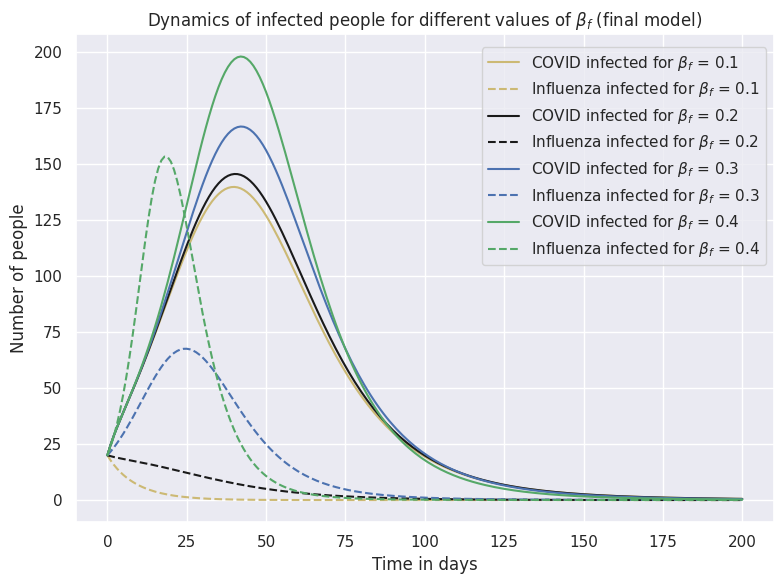

In [ ]:
# Plotting different graphs of total infections for different values of Betaf
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.0014
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over betaf values
betaf_values = [0.10, 0.2,0.3, 0.4]
for betaf in betaf_values:
    # Reset time and initial conditions for each betaf
    t = 0
    y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
        sum2 =np.sum(y0[8:14])
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current betaf
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, betaf in enumerate(betaf_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID infected for $\\beta_f$ = {betaf}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza infected for $\\beta_f$ = {betaf}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for different values of $\\beta_f$ (final model)')
legend = ax.legend(loc='right', bbox_to_anchor=(1.0, 0.75), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_dynamics_betaf_finalmodel.png')

# Display the figure
plt.show()


## Plotting different graphs of total infections for different values of Betac

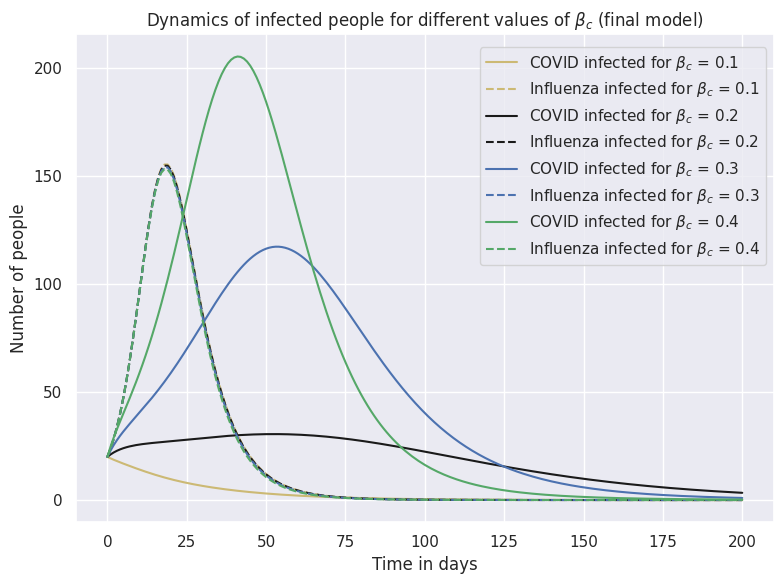

In [ ]:
# Plotting different graphs of total infections for different values of Betac
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.0014
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over betaf values
betac_values = [0.1,0.2,0.3,0.4]
for beta_c in betac_values:
    # Reset time and initial conditions for each betaf
    t = 0
    y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
        sum2 =np.sum(y0[8:14])
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, beta_c, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current betac
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, beta in enumerate(betac_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID infected for $\\beta_c$ = {beta}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza infected for $\\beta_c$ = {beta}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for different values of $\\beta_c$ (final model)')
legend = ax.legend(loc='right', bbox_to_anchor=(1.0, 0.75), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_dynamics_betac_finalmodel.png')

# Display the figure
plt.show()



## Plotting different graphs of total infections for different values of etaA

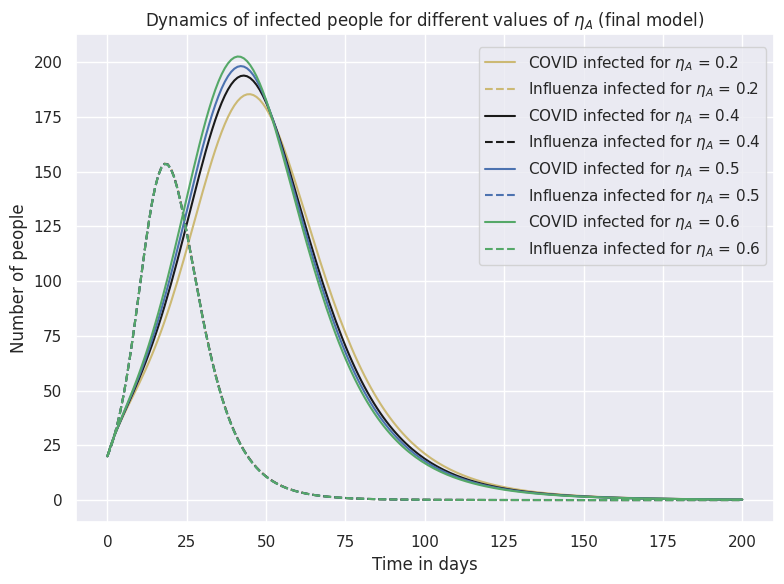

In [ ]:
# Plotting different graphs of total infections for different values of etaA
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.0014
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over etaA values
etaA_values = [0.2, 0.4, 0.5, 0.6]
for etaA in etaA_values:
    # Reset time and initial conditions for each u1
    t = 0
    y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
        sum2 =np.sum(y0[8:14])
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current etaA
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, etaA in enumerate(etaA_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID infected for $\eta_A$ = {etaA}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza infected for $\eta_A$ = {etaA}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for different values of $\eta_A$ (final model)')
legend = ax.legend(loc='right', bbox_to_anchor=(1.0, 0.75), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_dynamics_etaA_finalmodel.png')

# Display the figure
plt.show()


## Plotting different graphs of total infections for different values of etaH

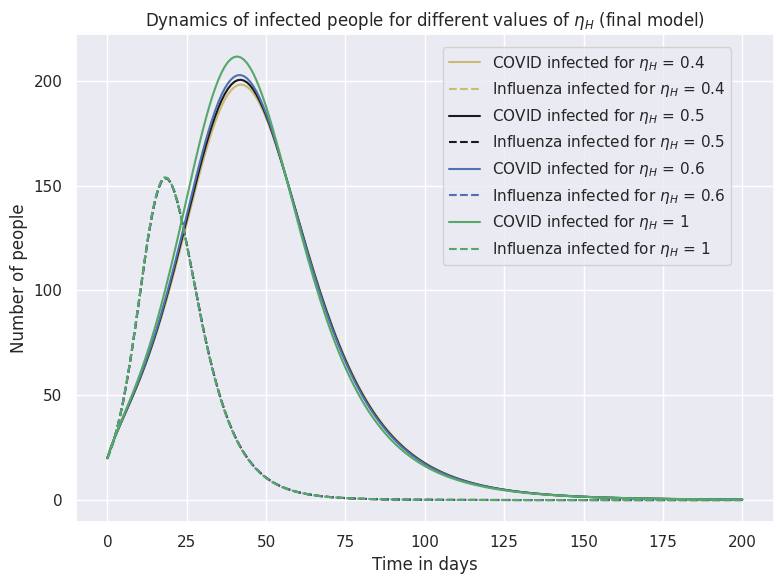

In [ ]:
# Plotting different graphs of total infections for different values of etaH
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.0014
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0,0 ]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over etaH values
etaH_values = [0.4, 0.5, 0.6,1]
for etaH in etaH_values:
    # Reset time and initial conditions for each etaH
    t = 0
    y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
        sum2 =np.sum(y0[8:14])
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current etaH
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, etaH in enumerate(etaH_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID infected for $\eta_H$ = {etaH}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza infected for $\eta_H$ = {etaH}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for different values of $\eta_H$ (final model)')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95, 0.75), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_dynamics_etaH_finalmodel.png')

# Display the figure
plt.show()


## Plotting different graphs of total infections for different values of gammaf

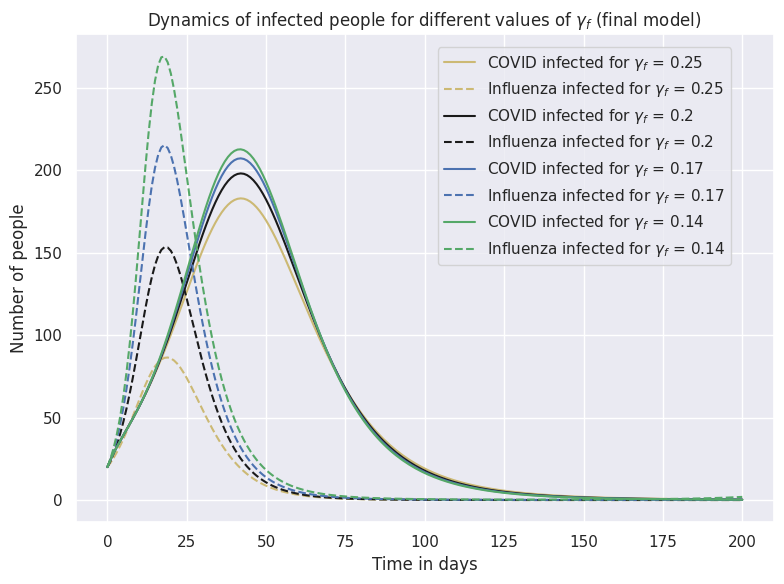

In [ ]:
# Plotting different graphs of total infections for different values of gammaf
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.0014
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over gammaf values
gammaf_values = [ 1/4, 1/5, 1/6, 1/7]
for gammaf in gammaf_values:
    # Reset time and initial conditions for each u1
    t = 0
    y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
        sum2 =np.sum(y0[8:14])
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current gammaf
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, gammaf in enumerate(gammaf_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID infected for $\gamma_f$ = {round(gammaf,2)}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza infected for $\gamma_f$ = {round(gammaf,2)}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for different values of $\gamma_f$ (final model)')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95, 0.75), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_dynamics_gammaf_finalmodel.png')

# Display the figure
plt.show()


## Plotting different graphs of total infections for different values of gammacA

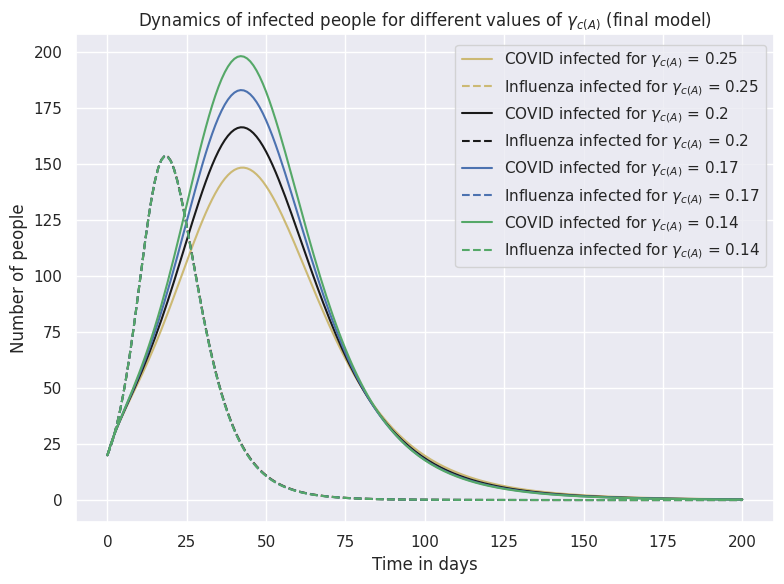

In [ ]:
# Plotting different graphs of total infections for different values of gammacA
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.0014
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over gammaf values
gammacA_values = [ 1/4, 1/5, 1/6, 1/7]
for gammacA in gammacA_values:
    # Reset time and initial conditions for each u1
    t = 0
    y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
        sum2 =np.sum(y0[8:14])
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current gammacA
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, gammacA in enumerate(gammacA_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID infected for $\gamma_{{c(A)}}$ = {round(gammacA,2)}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza infected for $\gamma_{{c(A)}}$ = {round(gammacA,2)}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for different values of $\gamma_{c(A)}$ (final model)')
legend = ax.legend(loc='right', bbox_to_anchor=(1.0, 0.75), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_dynamics_gammacA_finalmodel.png')

# Display the figure
plt.show()


## Plotting different graphs of total infections for different values of gammacI

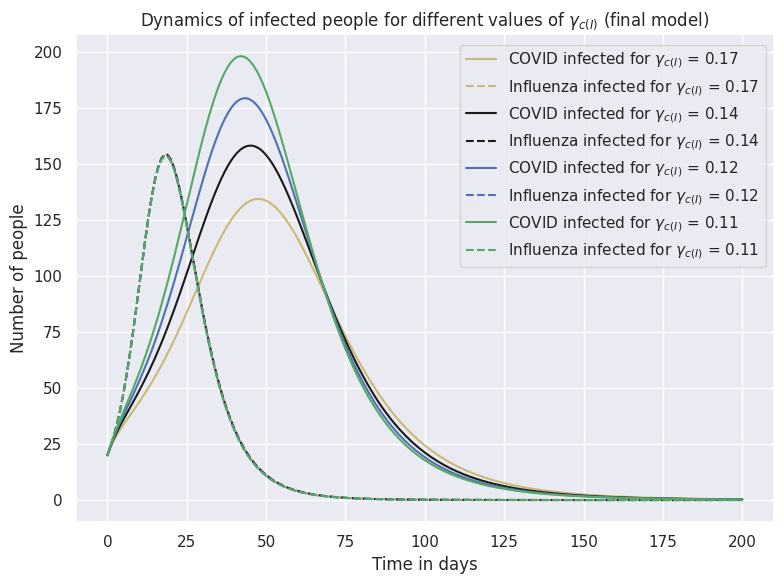

In [ ]:
# Plotting different graphs of total infections for different values of gammacI
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.0014
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over gammaf values
gammacI_values = [1/6, 1/7,1/8, 1/9]
for gammacI in gammacI_values:
    # Reset time and initial conditions for each u1
    t = 0
    y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
        sum2 =np.sum(y0[8:14])
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current gammacI
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, gammacI in enumerate(gammacI_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID infected for $\gamma_{{c(I)}}$ = {round(gammacI,2)}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza infected for $\gamma_{{c(I)}}$ = {round(gammacI,2)}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for different values of $\gamma_{c(I)}$ (final model)')
legend = ax.legend(loc='right', bbox_to_anchor=(1.0, 0.75), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_dynamics_gammacI_finalmodel.png')

# Display the figure
plt.show()


## Plotting different graphs of total infections for different values of gammacH

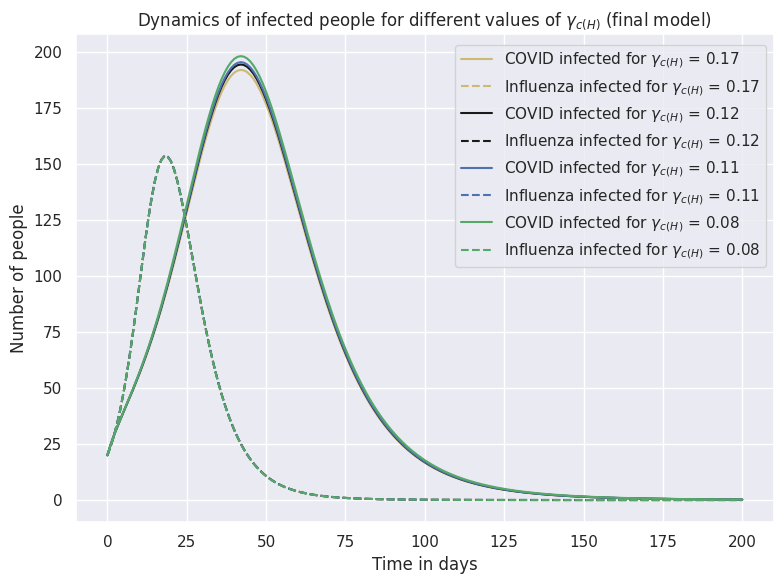

In [ ]:
# Plotting different graphs of total infections for different values of gammacH
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.0014
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over gammacH values
gammacH_values = [1/6, 1/8, 1/9, 1/12]
for gammacH in gammacH_values:
    # Reset time and initial conditions for each u1
    t = 0
    y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
        sum2 =np.sum(y0[8:14])
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current gammacH
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, gammacH in enumerate(gammacH_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID infected for $\gamma_{{c(H)}}$ = {round(gammacH,2)}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza infected for $\gamma_{{c(H)}}$ = {round(gammacH,2)}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for different values of $\gamma_{c(H)}$ (final model)')
legend = ax.legend(loc='right', bbox_to_anchor=(1.0, 0.75), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_dynamics_gammacH_finalmodel.png')

# Display the figure
plt.show()


## Plotting different graphs of total infections for different values of alpha

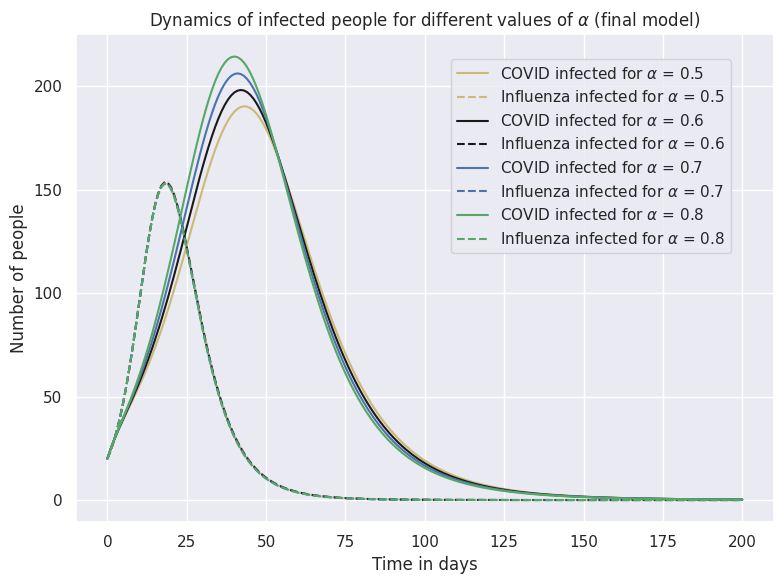

In [ ]:
# Plotting different graphs of total infections for different values of alpha
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.0014
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions

t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2 values
alpha_values = [0.5, 0.6, 0.7, 0.8]
for alpha in alpha_values:
    # Reset time and initial conditions for each alpha
    t = 0
    y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
        sum2 =np.sum(y0[8:14])
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current alpha
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, alpha in enumerate(alpha_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID infected for $\\alpha$ = {alpha}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza infected for $\\alpha$ = {alpha}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for different values of $\\alpha$ (final model)')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95, 0.75), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_dynamics_alpha_finalmodel.png')

# Display the figure
plt.show()


## Plotting different graphs of total infections for different values of y0

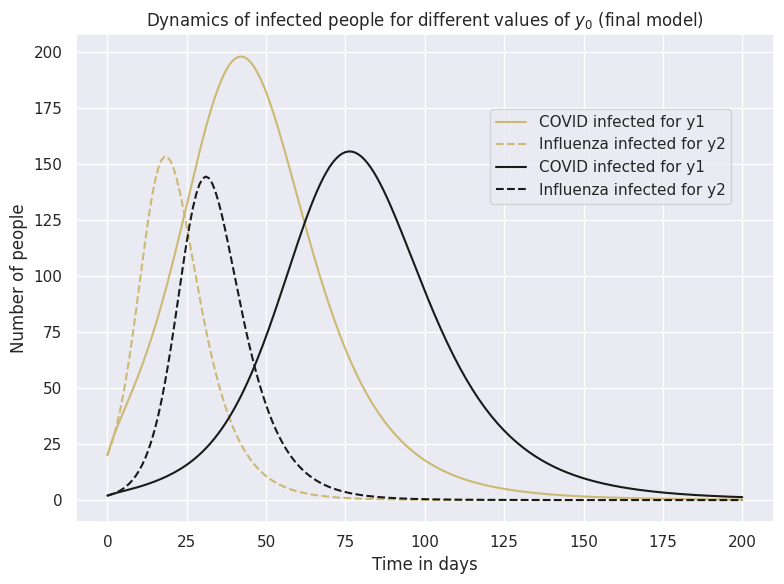

In [ ]:
# Plotting different graphs of total infections for different values of y0
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.0014
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over gammaf values
y0_values = [[970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0],[997, 0, 0, 0, 1, 0, 0,
          0, 1, 0, 0, 1, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]]
for y0 in y0_values:
    # Reset time and initial conditions for each u1
    t = 0
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
        sum2 =np.sum(y0[8:14])
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current gammaf
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':']
colors = ['y', 'k']
for i, y0 in enumerate(y0_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID infected for y1', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza infected for y2', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for different values of $y_0$ (final model)')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95, 0.75), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_dynamics_gammaf_finalmodel.png')

# Display the figure
plt.show()


In [ ]:
print(y0)

[997, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# One fold optimization

## Plotting different graphs of total infections for different values of u_1



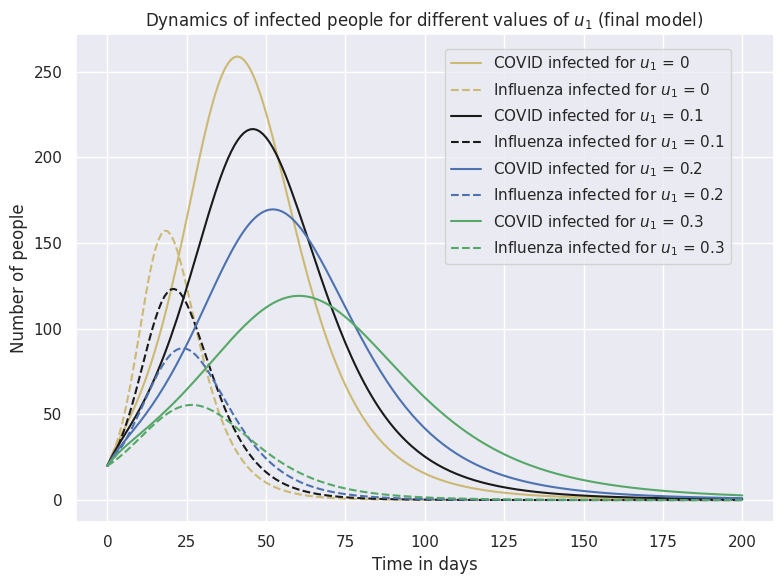

In [ ]:
# Plotting different graphs of total infections for different values of u_1
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007 *0
wc = 1/180 *0
ec = 0.94 *0

vf = 0.0014 *0
wf = 1/180 *0
ef = 0.67 *0

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u1 values
u1_values = [0, 0.10, 0.2,0.3]
for u1 in u1_values:
    # Reset time and initial conditions for each u1
    t = 0
    y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
        sum2 =np.sum(y0[8:14])
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u1
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, u1 in enumerate(u1_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID infected for $u_1$ = {u1}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza infected for $u_1$ = {u1}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for different values of $u_1$ (final model)')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95, 0.75), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_dynamics_u1_finalmodel.png')

# Display the figure
plt.show()




>## Plotting different graphs of total infections for different values of u_2 (vaccination to COVID-19)



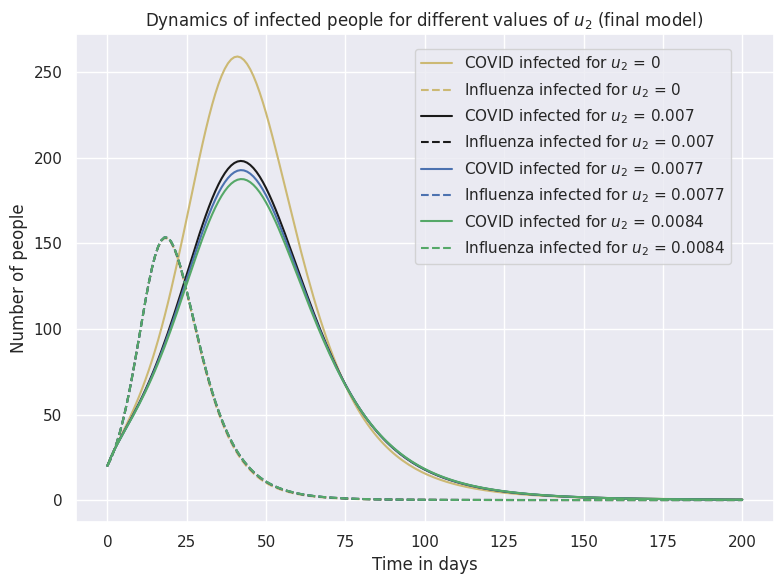

In [ ]:
# Plotting different graphs of total infections for different values of u_2 (vaccination to COVID-19)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.0014
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
vc = 1
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2 values
u2_values = [0, 0.007, 0.0077, 0.0084]
for u2 in u2_values:
    # Reset time and initial conditions for each u2
    t = 0
    y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0,0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
        sum2 =np.sum(y0[8:14])
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u2
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, u2 in enumerate(u2_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID infected for $u_2$ = {u2}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza infected for $u_2$ = {u2}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for different values of $u_2$ (final model)')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95, 0.75), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_dynamics_u2_finalmodel.png')

# Display the figure
plt.show()




> ## Plotting different graphs of total infections for different values of u_3 (Vaccination to Influenza)



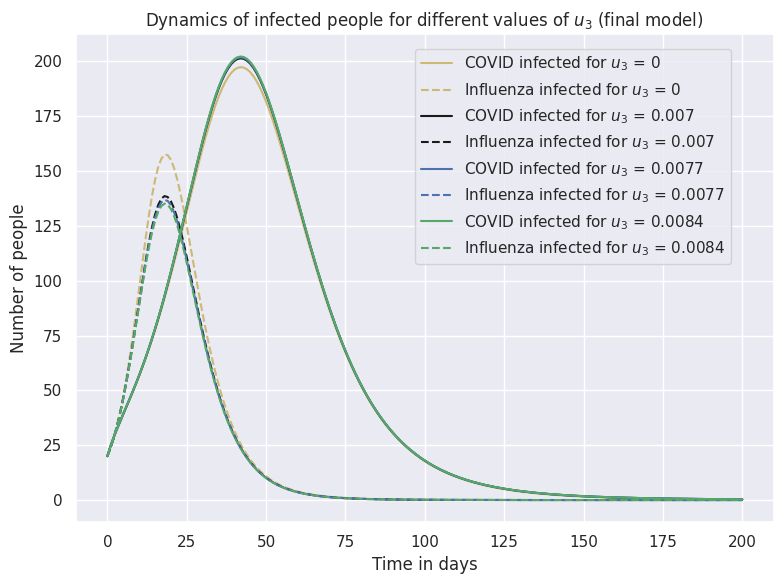

In [ ]:
# Plotting different graphs of total infections for different values of u_3 (Vaccination to Influenza)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.0014
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions
vf = 1
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2 values
u3_values = [0, 0.007, 0.0077, 0.0084]
for u3 in u3_values:
    # Reset time and initial conditions for each u_3 values (Vaccination to Influenza)
    t = 0
    y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
        sum2 =np.sum(y0[8:14])
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u3
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, u3 in enumerate(u3_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID infected for $u_3$ = {u3}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza infected for $u_3$ = {u3}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for different values of $u_3$ (final model)')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95, 0.75), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_dynamics_u3_finalmodel.png')

# Display the figure
plt.show()



>## Plotting different graphs of total infections for different values of u_4 (vaccines efficacy)

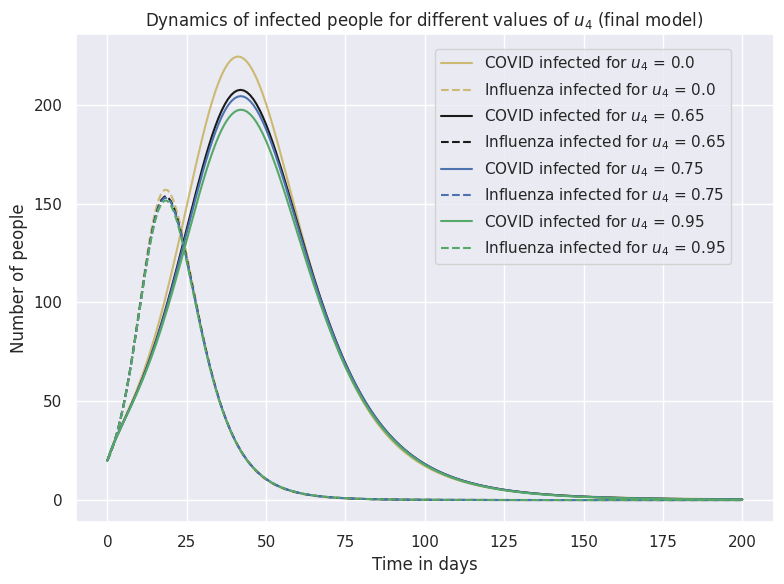

In [ ]:
# Plotting different graphs of total infections for different values of u_4 (vaccines efficacy)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.0014
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
ec=1
ef=1
u1=0
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u4 values
u4_values = [0.0, 0.65, 0.75, 0.95]
for u4 in u4_values:
    # Reset time and initial conditions for each u4_values
    t = 0
    y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
        sum2 =np.sum(y0[8:14])
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u4_values
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, u4 in enumerate(u4_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID infected for $u_4$ = {u4}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza infected for $u_4$ = {u4}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for different values of $u_4$ (final model)')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95, 0.75), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_dynamics_u4_finalmodel.png')

# Display the figure
plt.show()


## Plotting different graphs of total infections for different values of u_5 (improving the recovery of symptomatic infectious)

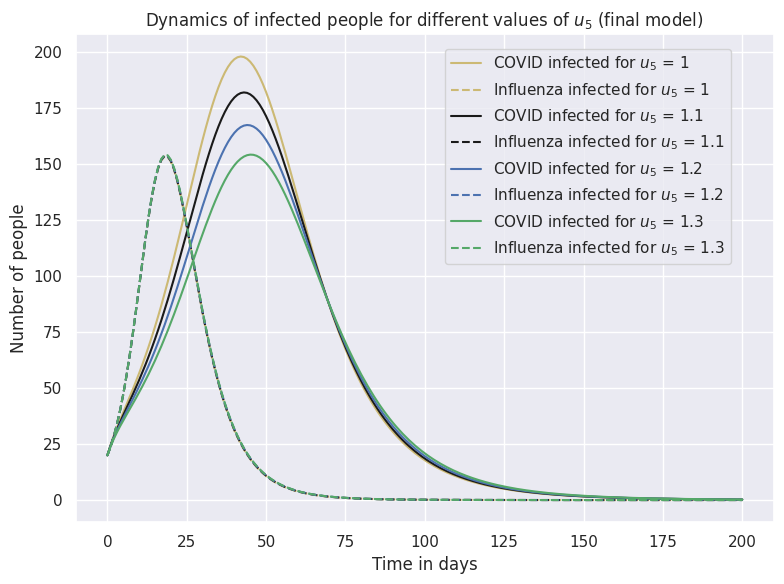

In [ ]:
# Plotting different graphs of total infections for different values of u_5 (improving the recovery of symptomatic infectious)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.0014
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions

t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2 values
u5_values = [1, 1.1, 1.2, 1.3]
for u5 in u5_values:
    # Reset time and initial conditions for each u5_values
    t = 0
    y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
        sum2 =np.sum(y0[8:14])
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u5_values
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, u5 in enumerate(u5_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID infected for $u_5$ = {u5}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza infected for $u_5$ = {u5}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for different values of $u_5$ (final model)')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95, 0.75), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_dynamics_u5_finalmodel.png')

# Display the figure
plt.show()


# Two fold optimization:

In [ ]:
print(u1)

0


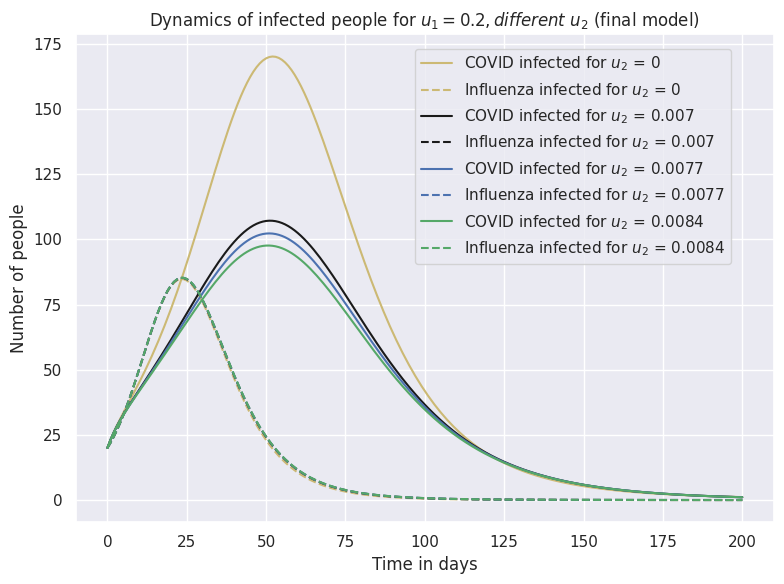

In [ ]:
# Plotting different graphs of total infections for u1=0.2 and different u2 (NPI and vaccination to COVID-19)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.0014
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0.2
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
vc = 1
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2 values
u2_values = [0, 0.007, 0.0077, 0.0084]
for u2 in u2_values:
    # Reset time and initial conditions for each u2
    t = 0
    y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0,0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
        sum2 =np.sum(y0[8:14])
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u2
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, u2 in enumerate(u2_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID infected for $u_2$ = {u2}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza infected for $u_2$ = {u2}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for $u_1=0.2,\t{different}$ $ u_2$ (final model)')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95, 0.75), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_dynamics_u1u2_finalmodel.png')

# Display the figure
plt.show()


In [ ]:
print(u2)

0.0084


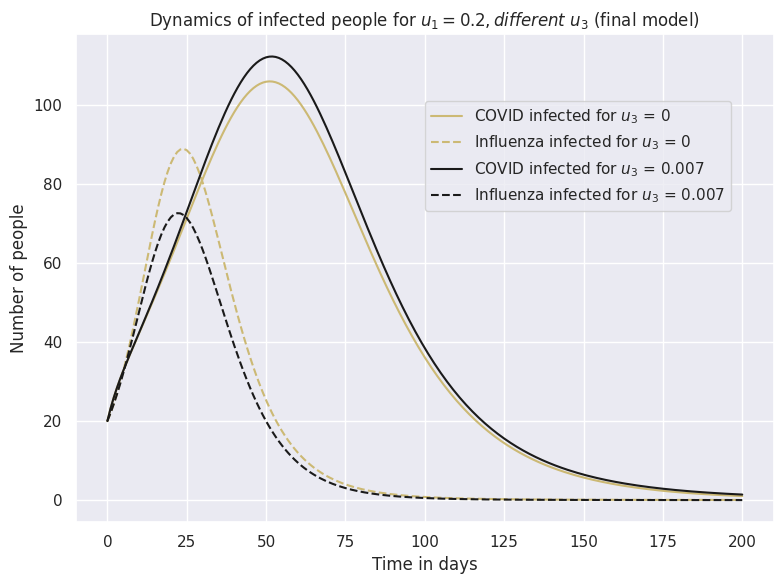

In [ ]:
# Plotting different graphs of total infections for u1=0.2 and different u3 (Vaccination to Influenza)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameters for time dependent control measures:
vc=1
u1 = 0.2
u2 = 0.007
u3 = 1
u4 = 1
u5 = 1
# Initialize time and initial conditions
vf = 1
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2 values
u3_values = [0, 0.007]
for u3 in u3_values:
    # Reset time and initial conditions for each u_3 values (Vaccination to Influenza)
    t = 0
    y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
    current_results = []
    current_sum1 = []
    current_sum2 = []

    # Reset times list before the inner loop
    times = []

    while t <= t_end:
        times.append(t)
        current_results.append(y0)

        # Calculate sums
        sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
        sum2 =np.sum(y0[8:14])
        current_sum1.append(sum1)
        current_sum2.append(sum2)

        sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                        etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

        t = t + 1
        y0 = sol.y[:, -1]

    # Append the results for the current u3
    results.append(np.array(current_results))
    sum_compartments1.append(np.array(current_sum1))
    sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
line_styles = ['-', ':', '--', '-.']
colors = ['y', 'k', 'b', 'g']
for i, u3 in enumerate(u3_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID infected for $u_3$ = {u3}', linestyle='-', color=colors[i])
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza infected for $u_3$ = {u3}', linestyle='--', color=colors[i])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for $u_1=0.2,\t{different}$ $u_3$ (final model)')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95, 0.75), ncol=1)
plt.tight_layout()
# Save the figure after displaying it
plt.savefig('fig_dynamics_u1u3_finalmodel.png')

# Display the figure
plt.show()


# Three fold optimization

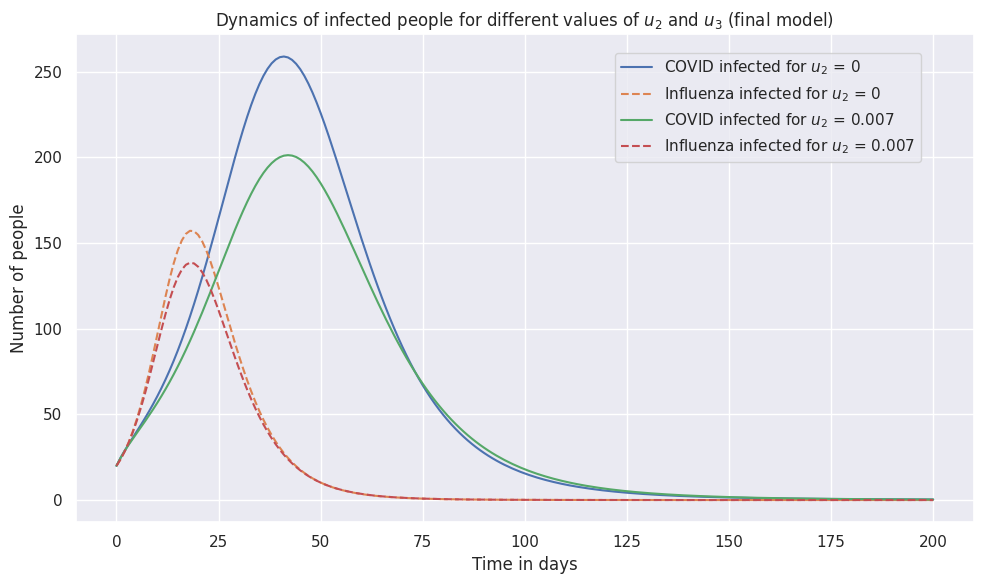

In [ ]:
# Three fold optimization. Here u3 has same values as u2.
# Plotting different graphs of total infections for different values of u1,u2 and u3 (NPI and vaccination to COVID-19)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.6* 0.007
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0.0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
vc = 1
vf=1
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2 values
u2_values = [0, 0.007]
# Loop for u_3 values also.
for u3 in u2_values:
    for u2 in u2_values:
        if u2 == u3:
            # Reset time and initial conditions for each u2
            t = 0
            y0 = [970, 0, 0, 0, 10, 0, 0,
                  0, 10, 0, 0, 10, 0, 0,
                  0, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0]
            current_results = []
            current_sum1 = []
            current_sum2 = []

            # Reset times list before the inner loop
            times = []

            while t <= t_end:
                times.append(t)
                current_results.append(y0)

                # Calculate sums
                sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
                sum2 = np.sum(y0[8:14])
                current_sum1.append(sum1)
                current_sum2.append(sum2)

                sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                                etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

                t = t + 1
                y0 = sol.y[:, -1]
        else:
            continue

        # Append the results for the current u2
        results.append(np.array(current_results))
        sum_compartments1.append(np.array(current_sum1))
        sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

for i, u2 in enumerate(u2_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID infected for $u_2$ = {u2}')
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza infected for $u_2$ = {u2}', linestyle='--')

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for different values of $u_2$ and $u_3$ (final model)')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95, 0.85), ncol=1)
plt.tight_layout()

# Save the figure after displaying it
plt.savefig('fig_dynamics_u2u3_finalmodel.png')

# Display the figure
plt.show()




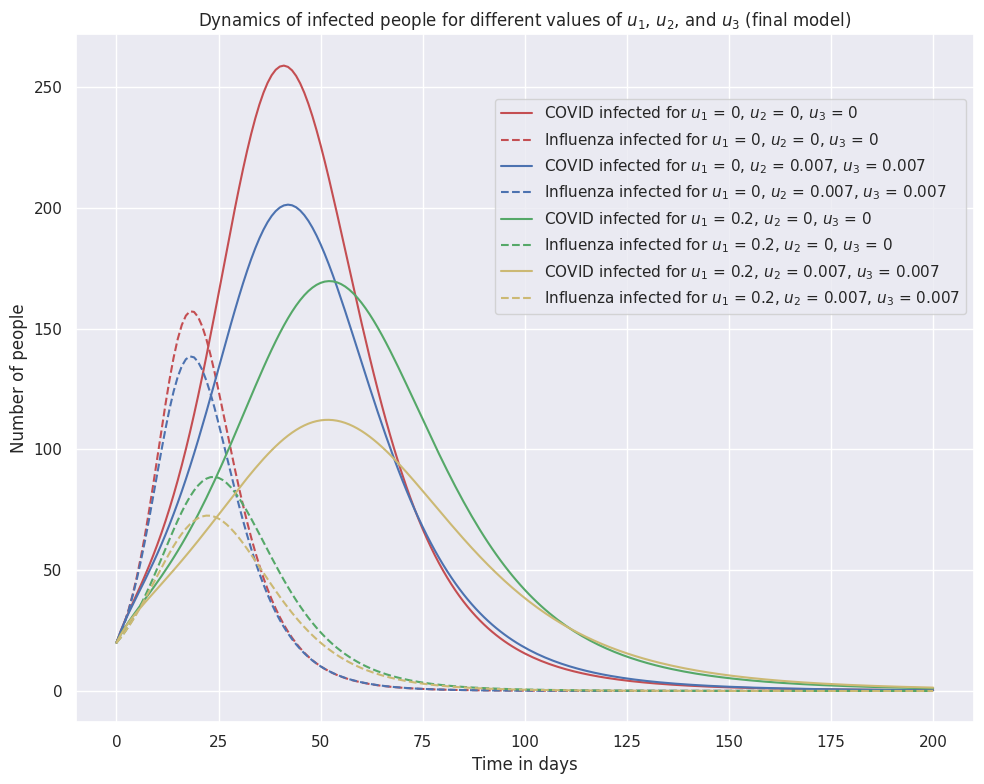

In [ ]:
# Three fold optimization
# Plotting different graphs of total infections for different values of u1,u2 and u3 (NPI and vaccination to COVID-19)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.6* 0.007
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:

u4 = 1
u5 = 1

u1_values = [0, 0.2]
u2_values = [0, 0.007]
# u3 takes values from u_2 values... (if want different see coming cell codes)

# Initialize time and initial conditions
vc = 1
vf=1
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2 values

# Loop for u_3 values also.
for u3 in u2_values:
    for u2 in u2_values:
        if u2 == u3:
            # Reset time and initial conditions for each u2
            t = 0
            y0 = [970, 0, 0, 0, 10, 0, 0,
                  0, 10, 0, 0, 10, 0, 0,
                  0, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0]
            current_results = []
            current_sum1 = []
            current_sum2 = []

            # Reset times list before the inner loop
            times = []

            while t <= t_end:
                times.append(t)
                current_results.append(y0)

                # Calculate sums
                sum1 = np.sum(y0[23])
                sum2 = np.sum(y0[24])
                current_sum1.append(sum1)
                current_sum2.append(sum2)

                sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                                etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

                t = t + 1
                y0 = sol.y[:, -1]
        else:
            continue

        # Append the results for the current u2
        results.append(np.array(current_results))
        sum_compartments1.append(np.array(current_sum1))
        sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Loop over u1 values

# Plot the results
fig, ax = plt.subplots(figsize=(10, 8))

# Define colors for each combination of u1, u2, and u3
colors = ['r', 'b', 'g', 'y']

for i, u1 in enumerate(u1_values):
    for j, u2 in enumerate(u2_values):
        for k, u3 in enumerate(u2_values):
            if u2 == u3:
                # Reset time and initial conditions for each combination of u1, u2, u3
                t = 0
                y0 = [970, 0, 0, 0, 10, 0, 0,
                      0, 10, 0, 0, 10, 0, 0,
                      0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0]
                current_results = []
                current_sum1 = []
                current_sum2 = []

                # Reset times list before the inner loop
                times = []

                while t <= t_end:
                    times.append(t)
                    current_results.append(y0)

                    # Calculate sums
                    sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
                    sum2 = np.sum(y0[8:14])
                    current_sum1.append(sum1)
                    current_sum2.append(sum2)

                    sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

                    t = t + 1
                    y0 = sol.y[:, -1]
            else:
                continue

            # Assign colors based on the combination of u1, u2, and u3
            color = colors[i * len(u2_values) + j]

            # Append the results for the current u1, u2, u3 combination
            ax.plot(times, current_sum1, label=f'COVID infected for $u_1$ = {u1}, $u_2$ = {u2}, $u_3$ = {u3}', linestyle='-', color=color)
            ax.plot(times, current_sum2, label=f'Influenza infected for $u_1$ = {u1}, $u_2$ = {u2}, $u_3$ = {u3}', linestyle='--', color=color)

# Set labels and title
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for different values of $u_1$, $u_2$, and $u_3$ (final model)')

# Add legend
legend = ax.legend(loc='right', bbox_to_anchor=(1.0, 0.75), ncol=1)
plt.tight_layout()

# Save the figure after displaying it
plt.savefig('fig_dynamics_u1u2u3_finalmodel.png')

# Display the figure
plt.show()


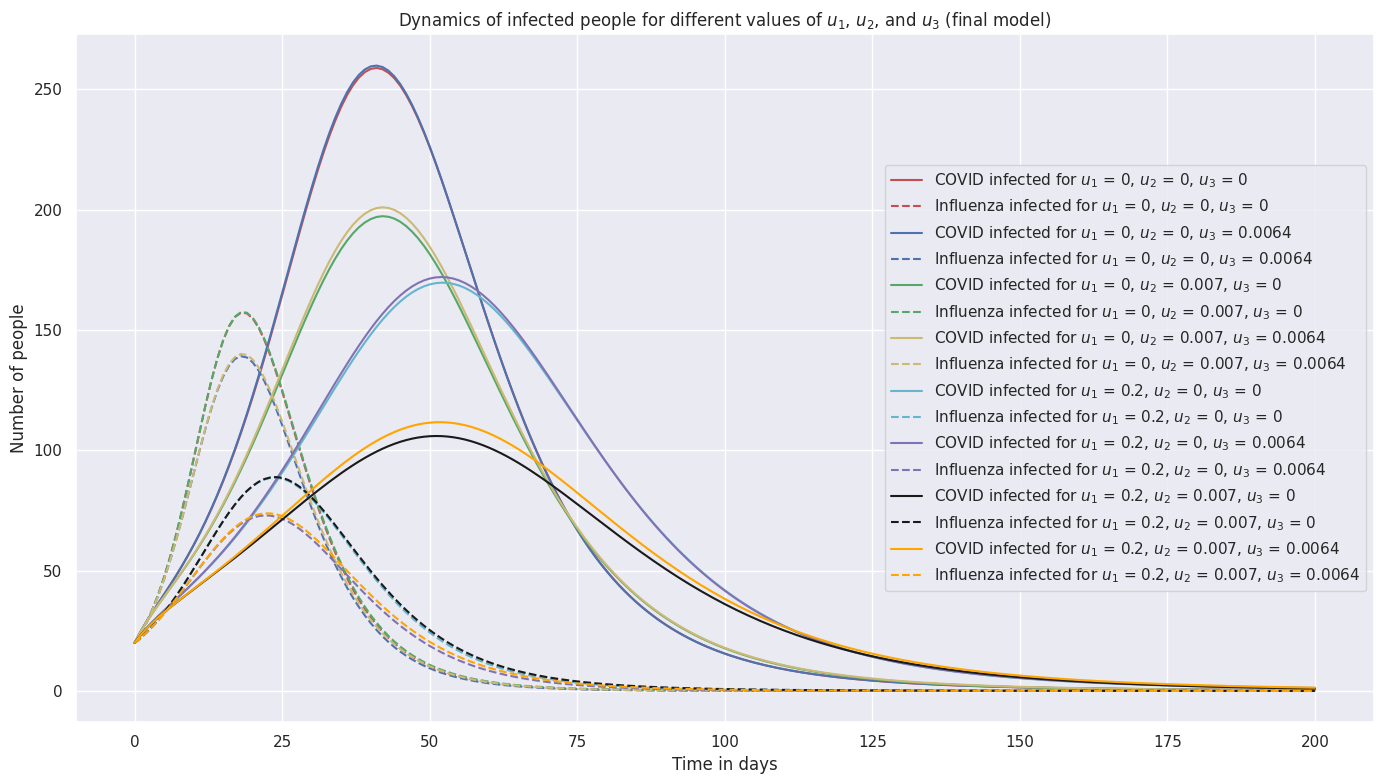

In [ ]:
# Three fold optimization with each of u1, u2, u3 having their own value sets
# Plotting different graphs of total infections for different values of u1,u2 and u3 (NPI and vaccination to COVID-19, Influenza)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.6* 0.007
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
# u1 = 0.0
# u2 = 1
# u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
vc = 1
vf=1
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# u1, u2, u3 values to Loop over:
u1_values = [0, 0.2]
u2_values = [0, 0.007]
u3_values = [0, 0.0064]

# Plot the results
fig, ax = plt.subplots(figsize=(14, 8))

# Define colors for each combination of u1, u2, and u3
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'orange']

for i, u1 in enumerate(u1_values):
    for j, u2 in enumerate(u2_values):
        for k, u3 in enumerate(u3_values):
            # Reset time and initial conditions for each combination of u1, u2, u3
            t = 0
            y0 = [970, 0, 0, 0, 10, 0, 0,
                  0, 10, 0, 0, 10, 0, 0,
                  0, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0]
            current_results = []
            current_sum1 = []
            current_sum2 = []

            # Reset times list before the inner loop
            times = []

            while t <= t_end:
                times.append(t)
                current_results.append(y0)

                # Calculate sums
                sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
                sum2 = np.sum(y0[8:14])
                current_sum1.append(sum1)
                current_sum2.append(sum2)

                sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                                etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

                t = t + 1
                y0 = sol.y[:, -1]

            # Assign colors based on the combination of u1, u2, and u3
            color = colors[i * (len(u2_values) * len(u3_values)) + j * len(u3_values) + k]

            # Append the results for the current u1, u2, u3 combination
            ax.plot(times, current_sum1, label=f'COVID infected for $u_1$ = {u1}, $u_2$ = {u2}, $u_3$ = {u3}', linestyle='-', color=color)
            ax.plot(times, current_sum2, label=f'Influenza infected for $u_1$ = {u1}, $u_2$ = {u2}, $u_3$ = {u3}', linestyle='--', color=color)

# Set labels and title
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for different values of $u_1$, $u_2$, and $u_3$ (final model)')

# Add legend
legend = ax.legend(loc='right', bbox_to_anchor=(1.0, 0.5), ncol=1)
plt.tight_layout()

# Save the figure after displaying it
plt.savefig('fig_complete_dynamics_u1u2u3_finalmodel.png')

# Display the figure
plt.show()


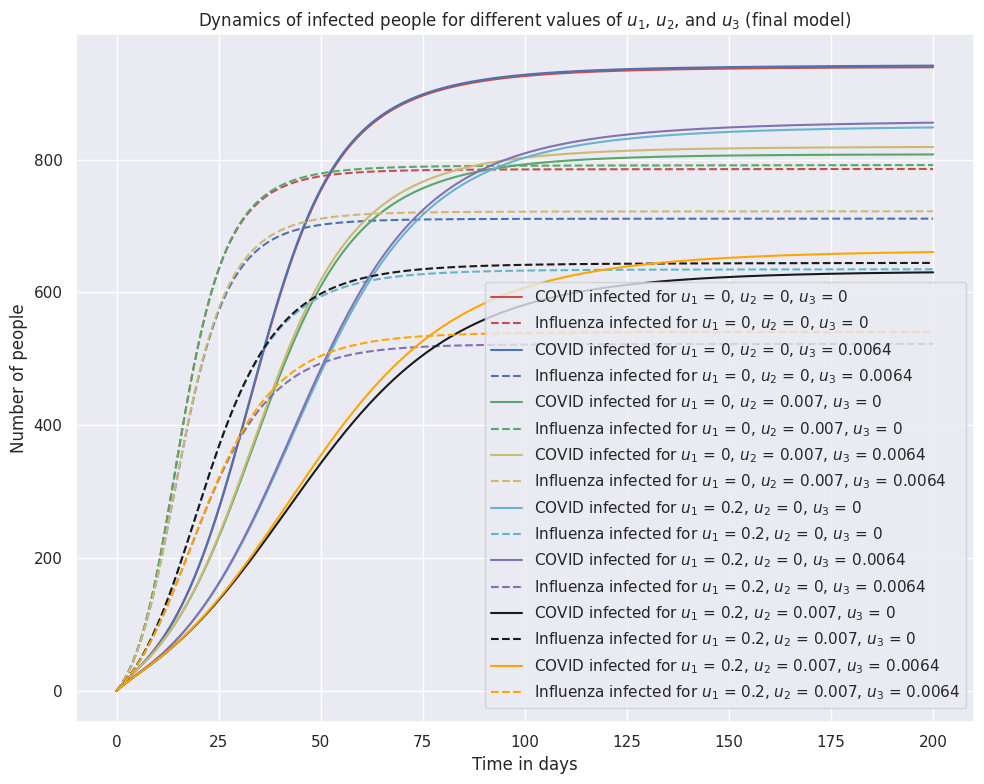

In [ ]:
# Three fold optimization (trying to plot the final size)
# Plotting different graphs of total infections for different values of u1,u2 and u3 (NPI and vaccination to COVID-19)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.6* 0.007
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0.0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Initialize time and initial conditions
vc = 1
vf=1
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = [20]  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = [20]  # Sum of KS, IE, IA, II, IH, IR

# Loop over u1 values
u1_values = [0, 0.2]
u2_values = [0, 0.007]
u3_values = [0, 0.0064]

# Plot the results
fig, ax = plt.subplots(figsize=(10, 8))

# Define colors for each combination of u1, u2, and u3
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'orange']

for i, u1 in enumerate(u1_values):
    for j, u2 in enumerate(u2_values):
        for k, u3 in enumerate(u3_values):
            # Reset time and initial conditions for each combination of u1, u2, u3
            t = 0
            y0 = [970, 0, 0, 0, 10, 0, 0,
                  0, 10, 0, 0, 10, 0, 0,
                  0, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0]
            current_results = []
            current_sum1 = []
            current_sum2 = []

            # Reset times list before the inner loop
            times = []

            while t <= t_end:
                times.append(t)
                current_results.append(y0)

                # Calculate sums
                sum1 = np.sum(y0[23])
                sum2 = np.sum(y0[24])
                current_sum1.append(sum1)
                current_sum2.append(sum2)

                sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                                etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

                t = t + 1
                y0 = sol.y[:, -1]

            # Assign colors based on the combination of u1, u2, and u3
            color = colors[i * (len(u2_values) * len(u3_values)) + j * len(u3_values) + k]

            # Append the results for the current u1, u2, u3 combination
            ax.plot(times, current_sum1, label=f'COVID infected for $u_1$ = {u1}, $u_2$ = {u2}, $u_3$ = {u3}', linestyle='-', color=color)
            ax.plot(times, current_sum2, label=f'Influenza infected for $u_1$ = {u1}, $u_2$ = {u2}, $u_3$ = {u3}', linestyle='--', color=color)

# Set labels and title
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Dynamics of infected people for different values of $u_1$, $u_2$, and $u_3$ (final model)')

# Add legend
legend = ax.legend(loc='right', bbox_to_anchor=(1.0, 0.33), ncol=1)
plt.tight_layout()

# Save the figure after displaying it
plt.savefig('fig_cumulative_u1u2u3_finalmodel.png')

# Display the figure
plt.show()


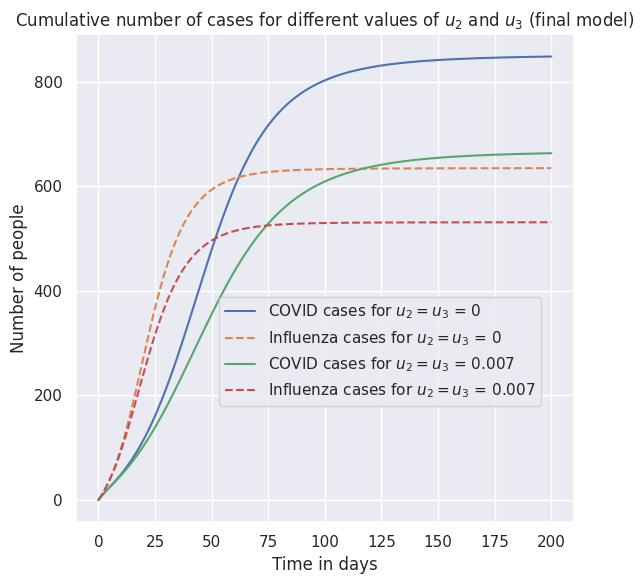

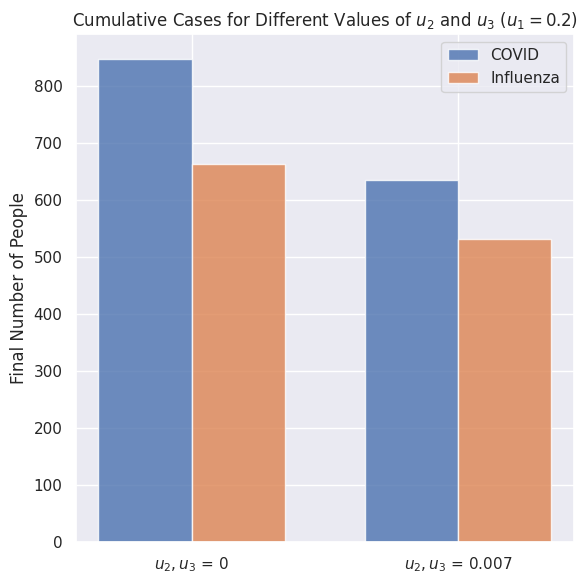

In [ ]:
# Three fold optimization with  u2=u3 in [0, 0.007]
# Plotting different graphs of total infections for u1=0.2, u2 and u3 in [0, 0.007]
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model1, parameters, and initial conditions here
# Parameter values: same
# Parameters related to vaccination:

wc = 1/180
ec = 0.94

# vf = 0.6* 0.007
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0.2
u2_values = [0, 0.007]
u4 = 1
u5 = 1
# u2, u3 in [0, 0.007]
# Initialize time and initial conditions
vc = 1
vf=1
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
      0, 10, 0, 0, 10, 0, 0,
      0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0]
times = []
results = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

# Loop over u2, u3 values

for u3 in u2_values:
    for u2 in u2_values:
        if u2 == u3:
            # Reset time and initial conditions for each u2
            t = 0
            y0 = [970, 0, 0, 0, 10, 0, 0,
                  0, 10, 0, 0, 10, 0, 0,
                  0, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0]
            current_results = []
            current_sum1 = []
            current_sum2 = []

            # Reset times list before the inner loop
            times = []

            while t <= t_end:
                times.append(t)
                current_results.append(y0)

                # Calculate sums
                sum1 = np.sum(y0[23])
                sum2 = np.sum(y0[24])
                current_sum1.append(sum1)
                current_sum2.append(sum2)

                sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                                                etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

                t = t + 1
                y0 = sol.y[:, -1]
        else:
            continue

        # Append the results for the current u2
        results.append(np.array(current_results))
        sum_compartments1.append(np.array(current_sum1))
        sum_compartments2.append(np.array(current_sum2))

# Convert results to a numpy array for easier manipulation
results = np.array(results)
sum_compartments1 = np.array(sum_compartments1)
sum_compartments2 = np.array(sum_compartments2)

# Plot the results
fig, ax = plt.subplots(figsize=(6, 6))

for i, u2 in enumerate(u2_values):
    ax.plot(times, sum_compartments1[i, :], label=f'COVID cases for $u_2=u_3$ = {u2}')
    ax.plot(times, sum_compartments2[i, :], label=f'Influenza cases for $u_2=u_3$ = {u2}', linestyle='--')

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title('Cumulative number of cases for different values of $u_2$ and $u_3$ (final model)')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95, 0.35), ncol=1)
plt.tight_layout()

# Save the figure after displaying it
plt.savefig('fig_cumulative_u2u3_finalmodel.png')

# Display the figure
plt.show()

################ for bar graph
# Plot the results as bar charts for the final values
fig, ax = plt.subplots(figsize=(6, 6))

bar_width = 0.35
opacity = 0.8
index = np.arange(len(u2_values))

for i, u2 in enumerate(u2_values):
    final_sum1 = sum_compartments1[i, -1]
    final_sum2 = sum_compartments2[i, -1]

    ax.bar(index + i * bar_width, [final_sum1, final_sum2], bar_width,
           alpha=opacity, label=f'$u_2$ = {u2}')

ax.set_xlabel('')
ax.set_ylabel('Final Number of People')
ax.set_title('Cumulative Cases for Different Values of $u_2$ and $u_3$ ($u_1=0.2$)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([f'$u_2,u_3$ = {u2}' for u2 in u2_values])

# Modify the legend labels
legend_labels = ['COVID', 'Influenza']
ax.legend(legend_labels)

plt.tight_layout()

# Save the figure after displaying it
plt.savefig('fig_cumulative_cases_u2u3_final.png')

# Display the figure
plt.show()


# Influenza only model

Betaf used=  0.40003512469265895
Reproduction number(R_e):= 1.7178447987200098
Betaf for R_0=1 is: 0.23287035300903242


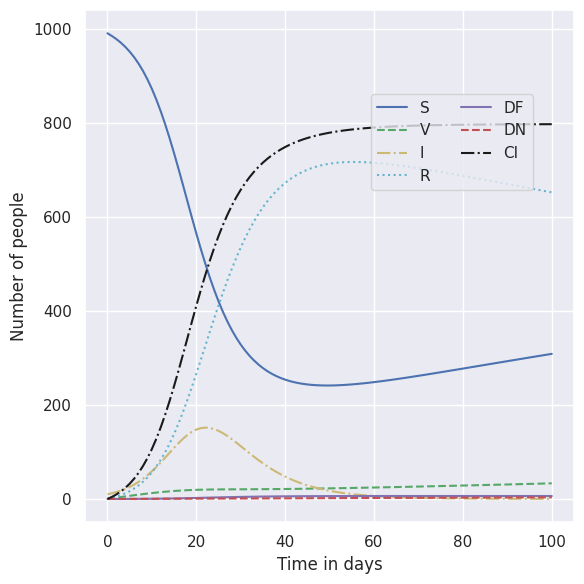

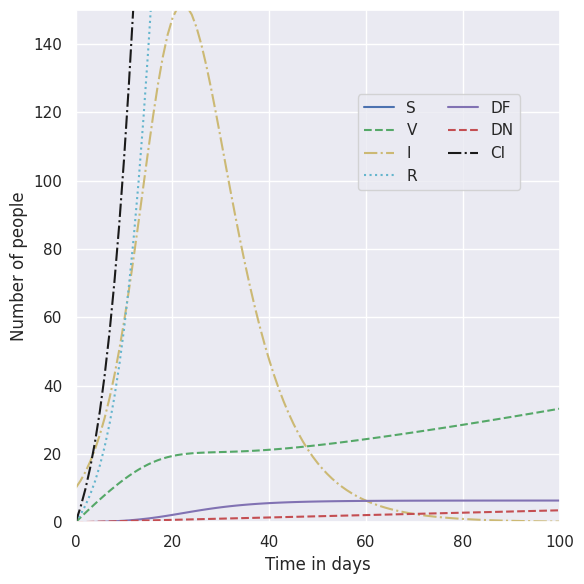

In [ ]:
# This is final Influenza model with vaccination...
# This is Influenza only model SVIRS
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
from scipy.integrate import solve_ivp
import numpy as np

def model_inf_Final(t, y, Lambda, betaf, gammaf,thetaf, mu, muf, vf, wf,ef, N):
    S, V, I, R, DF, DN, CI = y
    dS_dt = Lambda + wf * V + thetaf* R -betaf *I *S/N -(mu + vf)*S
    dV_dt = vf *S- (1-ef)*betaf * I*V/N -(mu+ wf)*V
    dI_dt = betaf * I*S/N  +(1-ef)*betaf * I*V/N -(gammaf +mu + muf)*I
    dR_dt = gammaf * I -(mu + thetaf)*R
    dDF_dt=muf*I
    dDN_dt= mu* (S+V+I+R)
    dCI_dt= betaf * I*S/N +(1-ef)*betaf* I*V/N
    return [dS_dt, dV_dt, dI_dt, dR_dt, dDF_dt, dDN_dt, dCI_dt ]

# General disese progression parameter values:

N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007
wc = 1/180
ec = 0.94

vf = 0.0014
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# Define reproduction number
R_e= betaf *( mu+ wf + (1-ef)* vf)/ ((gammaf+ mu + muf)*(mu + wf + vf))
print("Betaf used= ",betaf)
print( "Reproduction number(R_e):=", R_e)
Betaf= ((gammaf+ mu + muf)*(mu + wf + vf))/( mu+ wf + (1-ef)* vf)
print("Betaf for R_0=1 is:", Betaf)
# Parameters for time dependent control measures:


# Initialize time and initial conditions
t = 0
t_end = 100
y0 = [990, 0, 10, 0, 0, 0, 0]

# Lists to store the results at each time step
times = []
results = []

# Integration loop with a fixed time step of 1 day
while t <= t_end:
  times.append(t)
  results.append(y0)
  sol_inf_Final = solve_ivp(model_inf_Final, [t, t + 1], y0, args=(Lambda, betaf, gammaf,thetaf, mu, muf, vf, wf,ef, N))

  t = t + 1
  y0 = sol_inf_Final.y[:, -1]

# Convert results to a numpy array for easier manipulation
results_Final = np.array(results)

# Plot the results
fig, ax = plt.subplots(figsize=(6, 6))

# Define line styles and colors
line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'y', 'c', 'm', 'r', 'k']

curves = ax.plot(times, results_Final)

# Assign different colors and line styles
for i, curve in enumerate(curves):
    curve.set_linestyle(line_styles[i % len(line_styles)])
    curve.set_color(colors[i % len(colors)])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')

# Adjust legend position and size
legend = ax.legend(['S', 'V', 'I', 'R', 'DF', 'DN','CI'],
                   loc='upper center', bbox_to_anchor=(0.75, 0.85), ncol=2)
# You can adjust bbox_to_anchor to control the legend position relative to the plot

plt.tight_layout()

plt.savefig('fig_Inf_Final.png')
# plt.show()


#################################################################
# The following code is to zoom a portion of graph

fig, ax = plt.subplots(figsize=(6, 6))  # Set a specific figure size

# Define line styles and colors
line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'y', 'c', 'm', 'r', 'k']

curves = ax.plot(times, results)

# Assign different colors and line styles
for i, curve in enumerate(curves):
    curve.set_linestyle(line_styles[i % len(line_styles)])
    curve.set_color(colors[i % len(colors)])

# Set x-axis limits to zoom in from 0 to 100 days
ax.set_xlim(0, 100)
ax.set_ylim(0,150)
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')

# Adjust legend position and size
legend = ax.legend(['S', 'V', 'I', 'R', 'DF', 'DN', 'CI'],
                   loc='upper center', bbox_to_anchor=(0.75, 0.85), ncol=2)
# You can adjust bbox_to_anchor to control the legend position relative to the plot

plt.tight_layout()

# plt.savefig('fig.png')
# plt.show()

#############################################################


# Here is COVID only model

Betac ued=  0.3908709966999988
Reproduction number=  2.256430340174289
Betac to be for R_0=1 is: 0.1732253771546998


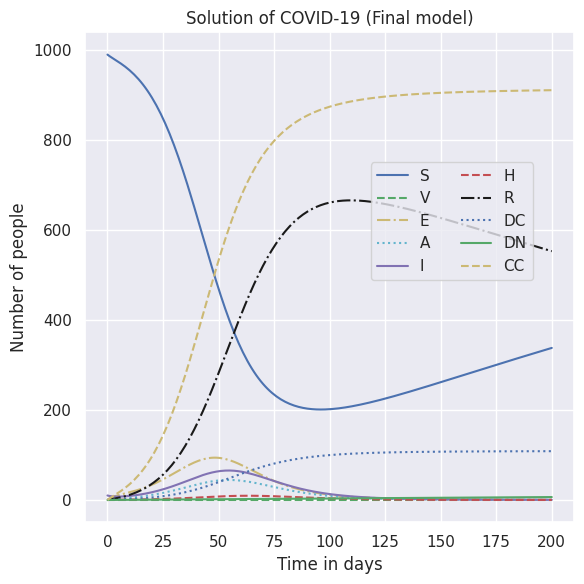

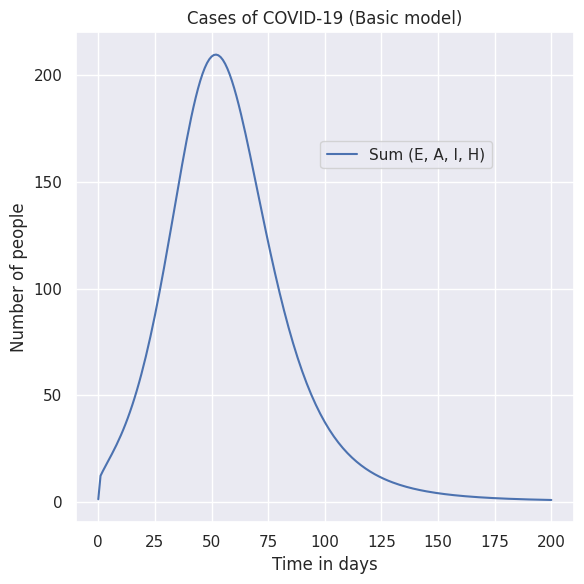

In [ ]:
# This is Covid-19 only model.....
# Final model
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
from scipy.integrate import solve_ivp
import numpy as np

def model_cov_Finl(t, y, Lambda, betac, deltac, gammacA, gammacI,
              gammacH, alpha, thetac, mu, muc, etaA, etaH, q, vc, hc, kappa2, wc, ec, N):
    S, V, E, A, I, H, R, DC, DN, CC = y
    dS_dt = Lambda + thetac * R +wc *V -(betac *(etaA *A+ I +etaH*H)/N + mu +vc)*S
    dV_dt = vc* (S+E+A)-((1-ec)*betac *(etaA *A+I +etaH*H)/N + mu + wc)*V
    dE_dt = (1-ec)*betac *(etaA *A+I +etaH*H)*V /N + betac *(etaA *A+I +etaH*H)*S /N -(deltac +mu +vc)*E
    dA_dt = (1-alpha)*deltac*E -(gammacA +mu +vc)*A
    dI_dt = alpha*deltac*E -((1-q)*gammacI +q*hc +mu +muc)*I
    dH_dt = q*hc* I- (gammacH + mu +kappa2*muc)*H
    dR_dt = gammacA*A + (1-q)*gammacI* I +gammacH*H -(mu +thetac)*R
    dDC_dt= muc* I + kappa2*muc* H
    dDN_dt= mu*(S+V+E+A+I+H+R)
    dCC_dt=(1-ec)*betac *(etaA *A+ I +etaH*H)*V /N + betac *(etaA *A+I +etaH*H)*S /N # this is cumulative of COVID-19 cases arising
    return [dS_dt, dV_dt, dE_dt, dA_dt, dI_dt, dH_dt, dR_dt, dDC_dt, dDN_dt, dCC_dt]

# Parameters values
# Parameter values:
N = 1000
Lambda= 1/(78*365) *1000
thetac = 1 / 365
thetaf = 1 / 365
betac = 0.3908709966999988
alpha = 0.6
deltac = 1/5.6
gammacA = 1/7
gammacI = 1/9
gammacH = 1/12
hc = 1/4
hfc = 1/3
betaf = 0.40003512469265894
gammaf = 1/5
phi = 0.5
kappa1 = 1.2
kappa2 = 0.6
etaA = 0.5
etaH = 0.4
q=0.0624

# Death rates:
mu = 1/(78*365)
muc = 0.026
muf = 0.001589

# Parameters related to vaccination:
vc = 0.007 *0
wc = 1/180 *0
ec = 0.94 *0

vf = 0.0014
wf = 1/180
ef = 0.67

# Parameters for time dependent control measures:
u1 = 0
u2 = 1
u3 = 1
u4 = 1
u5 = 1

# # Calculating reproduction number:

term1= (mu + wc + (1-ec)* vc)/(mu + wc+ vc)
K_7= deltac + mu +vc
K_8= gammacA +mu + vc
K_9= (1-q) * gammacI + q*hc +mu + muc
K_Ten = gammacH + mu + kappa2* muc
sum1=  (1-alpha)* deltac* etaA / (K_7*K_8)
sum2= alpha* deltac/ (K_7* K_9)
sum3=  alpha* deltac* q* hc* etaH/(K_7* K_9* K_Ten)
Re_c= term1* betac* (sum1+sum2+sum3)

print("Betac ued= ", betac)
#  return Re_c
print("Reproduction number= ", Re_c)
# R_e= betaf *( mu+ wf + (1-ef)* vf)/ ((gammaf+ mu + muf)*(mu + wf + vf))
# print( "Reproduction number(R_e):=", R_e)
Betac= 1/((sum1+sum2+sum3)*term1)

print("Betac to be for R_0=1 is:", Betac)
# Parameters for time dependent control measures:


# Initialize time and initial conditions
t = 0
t_end = 200
y0 = [990, 0, 0, 0, 10, 0, 0, 0, 0, 0]
# Lists to store the results at each time step
times = []
results = []
sum_compartments1=[]

# Integration loop with a fixed time step of 1 day
while t <= t_end:
  times.append(t)
  results.append(y0)
  sum_compartments1.append(sum1)
  sol_cov_Finl = solve_ivp(model_cov_Finl, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI,
                                                       gammacH, alpha, thetac, mu, muc, etaA, etaH, q, vc,
                                                       hc, kappa2, wc, ec, N))

  t = t + 1
  y0 = sol_cov_Finl.y[:, -1]
  sum1 = np.sum(y0[2:6])
  # print(t,y0[8]) # this gives cumulative covid infected

# Convert results to a numpy array for easier manipulation
results = np.array(results)

# Plot the results
fig, ax = plt.subplots(figsize=(6, 6))

# Define line styles and colors
line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'y', 'c', 'm', 'r', 'k']

curves = ax.plot(times, results)

# Assign different colors and line styles
for i, curve in enumerate(curves):
    curve.set_linestyle(line_styles[i % len(line_styles)])
    curve.set_color(colors[i % len(colors)])

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title("Solution of COVID-19 (Final model)")
# Adjust legend position and size
legend = ax.legend(['S', 'V', 'E', 'A', 'I', 'H', 'R', 'DC', 'DN','CC'],
                   loc='upper center', bbox_to_anchor=(0.75, 0.75), ncol=2)


plt.tight_layout()

plt.savefig('fig_cov_Final.png')
# plt.show()

###########  Plot only the infected curves
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(times, sum_compartments1, label='Sum (E, A, I, H)')

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
ax.set_title("Cases of COVID-19 (Basic model)")
# Adjust legend position
legend = ax.legend(loc='right', bbox_to_anchor=(0.85, 0.75), ncol=1)

plt.tight_layout()

plt.savefig('fig_covid_Infected.png')
# plt.show()


# This piece of code is for printing the total number of infected peoples from COVID, Influenza and both

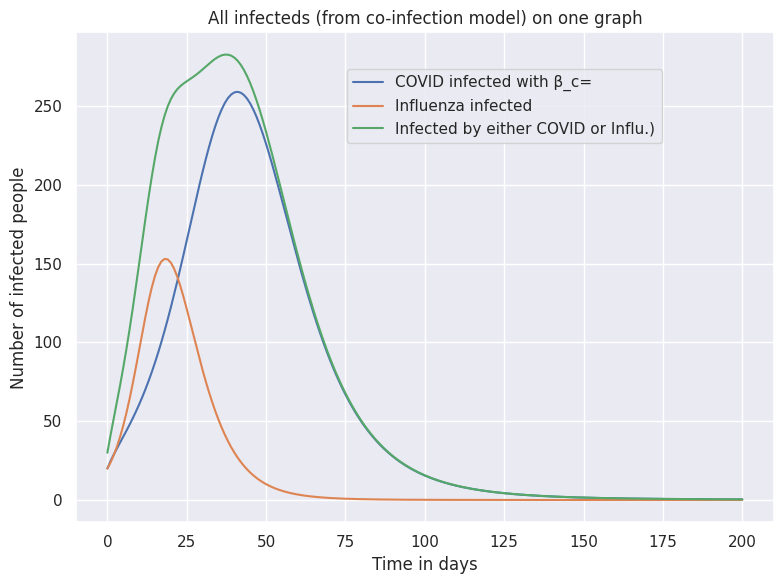

In [ ]:
# This piece of code is for printing the total number of infected peoples from COVID, Influenza and both
# Initialize time and initial conditions
t = 0
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
times = []
results = []

sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH ,IR
sum_compartments3 = []  # Sum of all KS, IE, SE, SA, SI, SH, IA, II, IH, RE, RA, RI, RH

while t <= t_end:
    times.append(t)
    results.append(y0)

    # Calculate sums
    sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
    sum2 = np.sum(y0[8:14])
    sum3 = np.sum(y0[2:6] + y0[15:19])+sum2

    sum_compartments1.append(sum1)
    sum_compartments2.append(sum2)
    sum_compartments3.append(sum3)

    sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

    t = t + 1
    y0 = sol.y[:, -1]

results = np.array(results)

# print(sum(np.round(results)))
# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))  # Set a specific figure size

# Plot only the three curves
ax.plot(times, sum_compartments1, label='COVID infected with β_c=')
ax.plot(times, sum_compartments2, label='Influenza infected')
ax.plot(times, sum_compartments3, label='Infected by either COVID or Influ.)')

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of infected people')
ax.set_title('All infecteds (from co-infection model) on one graph')
# Adjust legend position
legend = ax.legend(loc='right', bbox_to_anchor=(0.85, 0.85), ncol=1)

plt.tight_layout()

plt.savefig('fig_all_infected_on_one_graph.png')
# plt.show()


# Printing infected from COVID via both covid only model and co-infection model

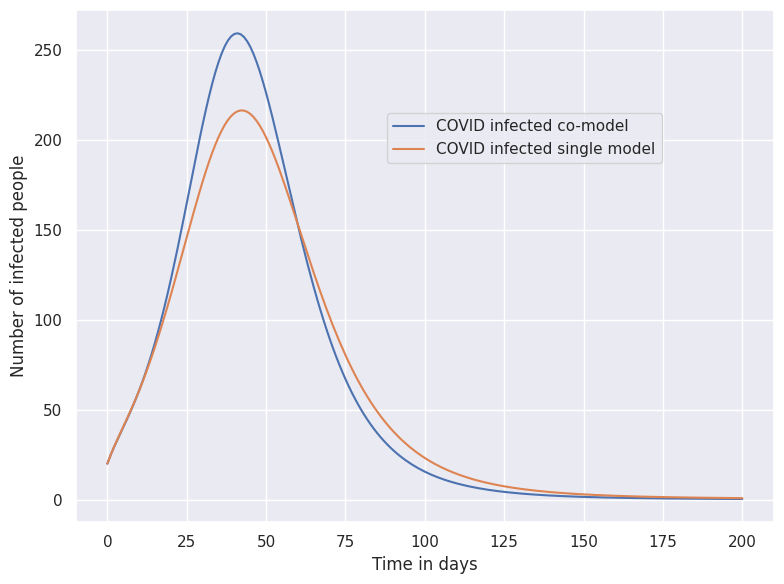

In [ ]:
# Printing infected from both COVId only model and the co-infection model
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Initialize time and initial conditions
t = 0
t_end = 200
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
z0 = [980, 0, 0, 0, 20, 0, 0, 0, 0, 0]
times = []
results1 = []  # Results for the first model
results2 = []  # Results for the second model

sum_compartments1 = []  # Sum of SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH for model1
sum_compartments2 = []  # Infected from COVID only model for model2

while t <= t_end:
    times.append(t)
    results1.append(y0)
    results2.append(z0)

    # Calculate sums for model1
    sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
    sum_compartments1.append(sum1)

    # Calculate sums for model2
    sum2 = np.sum(z0[2:6])
    sum_compartments2.append(sum2)

    sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))
    sol_cov_Finl = solve_ivp(model_cov_Finl, [t, t + 1], z0, args=(Lambda, betac, deltac, gammacA, gammacI,
                                                       gammacH, alpha, thetac, mu, muc, etaA, etaH, q, vc,
                                                       hc, kappa2, wc, ec, N))
    t = t + 1
    y0 = sol.y[:, -1]
    z0 = sol_cov_Finl.y[:, -1]

results1 = np.array(results1)
results2 = np.array(results2)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))  # Set a specific figure size

# Plot the two curves on the same graph
ax.plot(times, sum_compartments1, label='COVID infected co-model')
ax.plot(times, sum_compartments2, label='COVID infected single model')

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of infected people')

# Adjust legend position
legend = ax.legend(loc='right', bbox_to_anchor=(0.85, 0.75), ncol=1)

plt.tight_layout()

plt.savefig('fig2.png')
# plt.show()


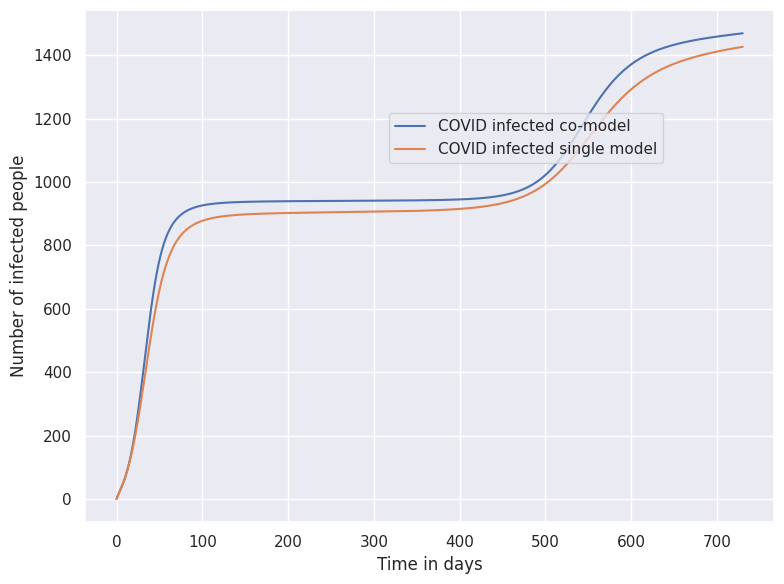

In [ ]:
# This is by me
# This piece of code is for printing the total number of infected peoples from COVID using both models
# Initialize time and initial conditions

t = 0
t_end = 730
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
z0 = [980, 0, 0, 0, 20, 0, 0, 0, 0, 0]
times = []
result1 = []
result2 = []
sum_compartments1 = []  # Sum of SE, SA, SI, SH, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Infected from COVID only model


while t <= t_end:
    times.append(t)
    result1.append(y0)
    result2.append(z0)

    # Calculate sums
    sum1 = np.sum(y0[23])
    sum2 = np.sum(z0[9])

    sum_compartments1.append(sum1)
    sum_compartments2.append(sum2)

    sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))
    sol_cov_Finl= solve_ivp(model_cov_Finl, [t, t + 1], z0, args=(Lambda, betac, deltac, gammacA, gammacI,
                                                       gammacH, alpha, thetac, mu, muc, etaA, etaH, q, vc,
                                                       hc, kappa2, wc, ec, N))
    t = t + 1
    y0 = sol.y[:, -1]
    z0= sol_cov_Finl.y[:,-1]

result1 = np.array(result1)
result2 = np.array(result2)

# print(sum(np.round(results)))
# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))  # Set a specific figure size

# Plot only the three curves
ax.plot(times, sum_compartments1, label='COVID infected co-model')
ax.plot(times, sum_compartments2, label='COVID infected single model')

ax.set_xlabel('Time in days')
ax.set_ylabel('Number of infected people')

# Adjust legend position
legend = ax.legend(loc='right', bbox_to_anchor=(0.85, 0.75), ncol=1)

plt.tight_layout()

plt.savefig('fig_COVinftd_bothmodel.png')
# plt.show()


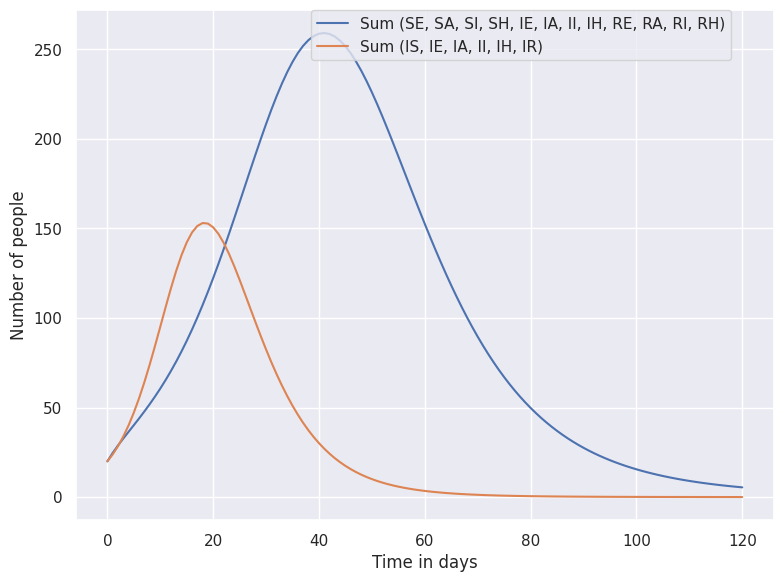

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
# Initialize time and initial conditions
t = 0
t_end = 120
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
times = []
results = []

sum_compartments1 = []  # Sum of SE, SA, SI, SH,IE, IA, II, IH, RE, RA, RI, RH
sum_compartments2 = []  # Sum of KS, IE, IA, II, IH, IR

while t <= t_end:
    times.append(t)
    results.append(y0)

    # Calculate sums
    sum1 = np.sum(y0[2:6] + y0[9:13] + y0[15:19])
    sum2 = np.sum(y0[8:14])

    sum_compartments1.append(sum1)
    sum_compartments2.append(sum2)

    sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

    t = t + 1
    y0 = sol.y[:, -1]

# Create a pandas DataFrame to store the results
data = {
    'Time (t)': times,
    'Sum (SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH)': sum_compartments1,
    'Sum (IS, IE, IA, II, IH, IR)': sum_compartments2
}
df = pd.DataFrame(data)

# Print the DataFrame in a nice tabular format
#print(df.to_markdown(index=False))

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(times, sum_compartments1, label='Sum (SE, SA, SI, SH, IE, IA, II, IH, RE, RA, RI, RH)')
ax.plot(times, sum_compartments2, label='Sum (IS, IE, IA, II, IH, IR)')
ax.set_xlabel('Time in days')
ax.set_ylabel('Number of people')
legend = ax.legend(loc='right', bbox_to_anchor=(0.95, 0.95), ncol=1)
plt.tight_layout()

# plt.savefig('fig.png')
# plt.show()  # Display the figure



In [ ]:
print(betac)

0.3908709966999988


# Printing results in table

In [ ]:
#pip install tabulate

In [ ]:
# #This code will print the time in days, the compartment values, and the total number of people for each time step in a table.
from tabulate import tabulate
import csv

# Initialize time and initial conditions
t = 0
t_end = 10
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]

# Lists to store the results at each time step
times = []
results = []

# Integration loop with a fixed time step of 1 day
while t <= t_end:
    times.append(t)
    results.append(y0)
    sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))
    t = t + 1
    y0 = sol.y[:, -1]

# Convert results to a numpy array for easier manipulation
results = np.array(results)

# Headers for the table
headers = ["Time (days)", "SS", "SV", "SE", "SA", "SI", "SH", "SR", "VS", "IS", "IE", "IA", "II", "IH", "IR", "RS", "RE", "RA", "RI", "RH", "RR", "DC", "DF", "DN", "Total","CovInf"]

# Combine time and results into a list of lists, calculate the row sums, and round the values
data = []
for t, result in zip(times, results):
    row_sum = np.sum(result)
    covid_infected=np.sum(result[2:6] + result[9:13] + result[15:19])
    rounded_result = [round(value) for value in result]
    data.append([t] + rounded_result + [round(row_sum)]+ [round(covid_infected)])

# Print the table
table = tabulate(data, headers, tablefmt="pretty")
print(table)
# Save the table as a CSV file
with open('output.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(headers)
    csvwriter.writerows(data)

print("CSV file saved as 'output.csv'")
######
# # Calculate and print the sum of final values at specific columns
# sum_columns = np.sum(results[:, [3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=0)
# sum_columns_rounded = [round(value) for value in sum_columns]
# print("Sum of final values at specific columns:")
# print(tabulate([sum_columns_rounded], headers[3:], tablefmt="pretty"))

# Calculate and print the sum of final values at specific columns for the last row
Cumulative_sum_covid_last_row = np.sum(results[-1, [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 15,  16, 17, 18, 19]])
Cumulative_sum_influenza_last_row = np.sum(results[-1, [ 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])
Cumulative_sum_coinfected_last_row = np.sum(results[-1, [ 9, 10, 11, 12]])
print("Cumulative Sum of COVID-19 cases:", Cumulative_sum_covid_last_row)
print(tabulate([[round(Cumulative_sum_covid_last_row)]], tablefmt="pretty"))
print("Cumulative Sum of CO-infected cases:", Cumulative_sum_coinfected_last_row) # this is not correct
print("Cumulative Sum of Influenza cases:", Cumulative_sum_influenza_last_row)
print(tabulate([[round(Cumulative_sum_influenza_last_row)]], tablefmt="pretty"))

######################## Transpose a table
# Combine time and results into a list of lists, calculate the row sums, and round the values
data = []
for t, result in zip(times, results):
    row_sum = np.sum(result)
    covid_infected = np.sum(result[2:6] + result[9:13] + result[15:19])
    rounded_result = [round(value) for value in result]
    data.append([t] + rounded_result + [round(row_sum)] )

# Transpose the data and headers before tabulating
transposed_data = np.array(data).T.tolist()
transposed_headers = headers

# Print the transposed table
transposed_table = tabulate(transposed_data, tablefmt="pretty")
print(transposed_table)

# Save the transposed table as a CSV file
with open('transposed_output.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    # csvwriter.writerow(transposed_headers)
    csvwriter.writerows(zip(*transposed_data[1:]))

print("Transposed CSV file saved as 'transposed_output.csv'")

+----+-----+-------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+-------+--------+
|    |     | Time (days) | SS | SV | SE | SA | SI | SH | SR | VS | IS | IE | IA | II | IH | IR | RS | RE | RA | RI | RH | RR | DC | DF | DN  | Total | CovInf |
+----+-----+-------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+-------+--------+
| 0  | 970 |      0      | 0  | 0  | 10 | 0  | 0  | 0  | 10 | 0  | 0  | 10 | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  |  0  | 1000  |   20   |
| 1  | 953 |      0      | 6  | 0  | 9  | 0  | 1  | 1  | 16 | 0  | 0  | 7  | 0  | 1  | 3  | 0  | 0  | 2  | 0  | 0  | 1  | 0  | 0  | 7  |  9  | 1016  |   25   |
| 2  | 936 |      0      | 11 | 1  | 9  | 0  | 2  | 3  | 22 | 0  | 0  | 5  | 0  | 1  | 6  | 0  | 0  | 2  | 0  | 1  | 1  | 0  | 0  | 14 | 19  | 1032  |   29   |
| 3  | 917 |      0      | 15 | 2  | 9  

In [ ]:
# #This code will print the time in days, the compartment values for each time step.
# Initialize time and initial conditions
t = 0
t_end = 130
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]

# Print headers
print("Time (days), SS, SV, SE, SA, SI, SH, SR, VS, IS, IE, IA, II, IH, IR, RS, RE, RA, RI, RH, RR, DC, DF, DN")

# Integration loop with a fixed time step of 1 day
while t <= t_end:
    rounded_y0 = [round(value) for value in y0]
    print(f"{t}, {', '.join(map(str, rounded_y0))}")
    sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))
    t = t + 1
    y0 = sol.y[:, -1]


Time (days), SS, SV, SE, SA, SI, SH, SR, VS, IS, IE, IA, II, IH, IR, RS, RE, RA, RI, RH, RR, DC, DF, DN
0, 970, 0, 0, 0, 10, 0, 0, 0, 10, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
1, 953, 0, 6, 0, 9, 0, 1, 1, 16, 0, 0, 7, 0, 1, 3, 0, 0, 2, 0, 0, 1, 0, 0, 7, 9
2, 936, 0, 11, 1, 9, 0, 2, 3, 22, 0, 0, 5, 0, 1, 6, 0, 0, 2, 0, 1, 1, 0, 0, 14, 19
3, 917, 0, 15, 2, 9, 0, 3, 4, 28, 0, 0, 4, 0, 1, 11, 0, 0, 3, 0, 1, 1, 0, 0, 20, 30
4, 897, 0, 17, 2, 9, 0, 4, 5, 35, 1, 0, 3, 0, 2, 17, 0, 0, 3, 0, 2, 2, 0, 0, 26, 44
5, 875, 0, 19, 3, 9, 1, 5, 6, 42, 1, 0, 2, 0, 2, 25, 1, 0, 3, 0, 2, 2, 0, 0, 32, 60
6, 850, 0, 21, 4, 10, 1, 7, 7, 50, 1, 0, 2, 0, 2, 34, 1, 0, 3, 0, 3, 3, 0, 0, 39, 79
7, 823, 0, 23, 5, 11, 1, 8, 8, 59, 2, 0, 2, 0, 2, 44, 1, 0, 3, 0, 4, 3, 0, 0, 45, 100
8, 794, 0, 24, 6, 11, 1, 10, 9, 68, 2, 0, 1, 0, 2, 56, 2, 0, 3, 0, 5, 4, 1, 0, 52, 123
9, 762, 0, 25, 6, 12, 1, 12, 10, 77, 3, 1, 2, 0, 2, 70, 3, 0, 3, 1, 5, 4, 1, 0, 60, 150
10, 728, 0, 26, 7, 12, 1, 14, 11, 87, 3, 1, 2, 0, 2, 

In [ ]:
# codes for plotting individual graphs
# Plot individual graphs for each variable
# for i, variable in enumerate(['SS', 'SV', 'SE', 'SA', 'SI', 'SH', 'SR', 'VS', 'IS', 'IE', 'IA', 'II', 'IH', 'IR', 'RS', 'RE', 'RA', 'RI', 'RH', 'RR', 'DC', 'DF', 'DN']):
#     plt.figure()
#     plt.plot(times, results[:, i])
#     plt.xlabel('Time in days')
#     plt.ylabel('Number of people')
#     plt.title(variable)
#   # plt.savefig(f'{variable}.png')

# # Show or save the individual plots
# plt.show()

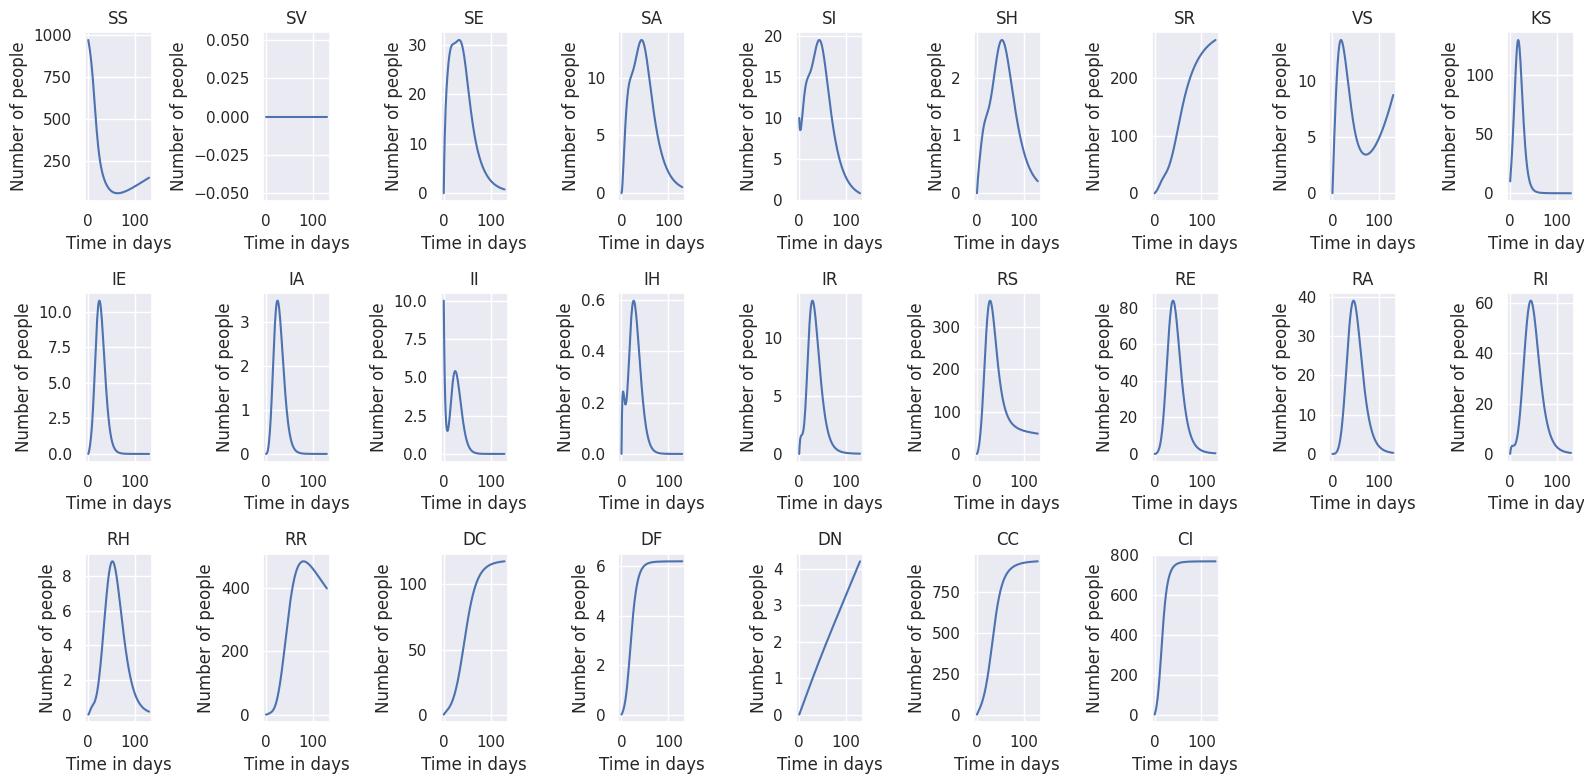

In [ ]:


# Initialize time and initial conditions
t = 0
t_end = 130
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]
times = []
results = []

while t <= t_end:
    times.append(t)
    results.append(y0)

    sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))

    t = t + 1
    y0 = sol.y[:, -1]

results = np.array(results)

# Create a multicolumn figure
fig, axes = plt.subplots(3, 9, figsize=(16, 8))
axes = axes.flatten()
variables = ['SS', 'SV', 'SE', 'SA', 'SI', 'SH', 'SR', 'VS', 'KS', 'IE', 'IA', 'II', 'IH', 'IR', 'RS', 'RE', 'RA', 'RI', 'RH', 'RR', 'DC', 'DF', 'DN','CC', 'CI']

for i, variable in enumerate(variables):
    ax = axes[i]
    ax.plot(times, results[:, i])
    ax.set_xlabel('Time in days')
    ax.set_ylabel('Number of people')
    ax.set_title(variable)

# Hide empty subplots
for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.savefig('multicolumn_fig.png')
# plt.show()


In [ ]:
# Printing the numerical result.
from tabulate import tabulate

# Initialize time and initial conditions
t = 0
t_end = 130
y0 = [970, 0, 0, 0, 10, 0, 0,
          0, 10, 0, 0, 10, 0, 0,
          0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]

# Lists to store the results at each time step
times = []
results = []

# Integration loop with a fixed time step of 1 day
while t <= t_end:
    times.append(t)
    results.append(y0)
    sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
                                    etaA, etaH, q, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))
    t = t + 1
    y0 = sol.y[:, -1]

# Convert results to a numpy array for easier manipulation
results = np.array(results)

# Headers for the table
headers = ["Time (days)", "SS", "SV", "SE", "SA", "SI", "SH", "SR", "VS", "IS", "IE", "IA", "II", "IH", "IR", "RS", "RE", "RA", "RI", "RH", "RR", "DC", "DF", "DN", "Total", "Cum_cov", "Cum_Inf"]

# Combine time and results into a list of lists, and calculate the row sums
data = []
for t, result in zip(times, results):
    row_sum = np.sum(result)
    data.append([t] + list(result) + [row_sum])

# Print the table
table = tabulate(data, headers, tablefmt="pretty")
print(table)


+-------------+--------------------+-----+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+----------------------+------------------------+------------------------+------------------------+------------------------+----------------------+--------------------+----------------------+-----------------------+---------------------+----------------------+---------------------+--------------------+---------------------+----------------------+--------------------+--------------------+--------------------+
| Time (days) |         SS         | SV  |         SE         |         SA         |         SI         |         SH          |         SR         |         VS         |          IS          |           IE           |           IA           |           II           |           IH           |          IR          |         RS         |          RE          |          RA           |         RI          |          RH   

In [ ]:
# # This code will print the time in days, the compartment valuesbut not in table.
# # Initialize time and initial conditions
# t = 0
# t_end = 730
# y0 =[970, 0, 0, 0, 10, 0, 0, 0, 10, 0, 0, 10, 0, 0,0, 0, 0, 0, 0, 0, 0, 0,0]

# # Print headers
# print("Time (days), SS, SV, SE, SA, SI, SH, SR, VS, KS, IE, IA, II, IH, IR, RS, RE, RA, RI, RH, RR, DC, DF")

# # Integration loop with a fixed time step of 1 day
# while t <= t_end:
#     print(f"{t}, {', '.join(map(str, y0))}")
#     sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
#                                     etaA, etaH, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))
#     t = t + 1
#     y0 = sol.y[:, -1]


In [ ]:
# # This prints the numerical solution without table. This is kept just for book keeping.
# # Initialize time and initial conditions
# t = 0
# t_end = 365
# y0 = [970, 0, 0, 0, 10, 0, 0, 0, 10, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# # Print headers
# print("Time (days), SS, SV, SE, SA, SI, SH, SR, VS, KS, IE, IA, II, IH, IR, RS, RE, RA, RI, RH, RR, DC, DF, Total")

# # Integration loop with a fixed time step of 1 day
# while t <= t_end:
#     compartment_values = y0
#     total_people = sum(compartment_values)
#     print(f"{t}, {', '.join(map(str, compartment_values))}, {total_people}")
#     sol = solve_ivp(model1, [t, t + 1], y0, args=(Lambda, betac, deltac, gammacA, gammacI, gammacH, betaf, alpha, gammaf, phi, thetac, thetaf, mu, muc, muf,
#                                     etaA, etaH, vc, vf, hc, hfc, kappa1, kappa2, wc, wf, ec, ef, u1, u2, u3, u4, u5, N))
#     t = t + 1
#     y0 = sol.y[:, -1]


In [ ]:
sol.y[0]

array([151.07875744, 151.42509964, 152.78720769])

In [ ]:
sol.t

array([130.        , 130.20260266, 131.        ])